# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib as mpl
import pandas as pd

# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [ ]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0., kernel_param=1., num_iter_gd=100):
    #Arguments:
    #X : (n,d) shape numpy array
    #Y : (n,)  shape numpy array
    #X_test : (m,d) shape numpy array
    #kernel = 'linear' or 'rbf' or 'poly' 
    #reg_param = $\lambda$
    #num_iter_gd = number of GD iterations.

    #Returns the result of kernel logistic regression :
    #alpha: Vector of solutions for the dual. Numpy array of shape (n,)

    #Primal problem:
    #$ \min_w  \sum_{i=1}^n \log(1+\exp(-y_i* \w^\top \phi(\x_i)))  + \frac{\lambda}{2} ||\w||^2 $

    #the dual of which is

    #$ \min_alpha \sum_{i=1}^n \log(1+\exp(-y_i* \alpha^\top K_{:,i} ))  + \frac{\lambda}{2} \alpha^\top K \alpha $
    #where $\phi$ is the feature got by the kernel.

    #Where K is the nxn kernel matrix computed on the training data.

    #The kernel is defined by the kernel_param:
    #If kernel=linear: K(\u,\v) = \u^\top \v  
    #If kernel=poly:  K(\u,\v) = (1+\u^\top \v)^(kernel_param)
    #If kernel=rbf:  K(\u,\v) = \exp(-kernel_param*||\u-\v||^2)

    n = X.shape[0]
    K = np.zeros([n,n])

    if kernel == 'linear':

      K = linear_kernel(X, X)

    if kernel == 'poly':

      K = polynomial_kernel(X, X, kernel_param, 1)

    if kernel == 'rbf':

      for i in range(n):
        for j in range(n):
          K[i,j] = np.exp(-kernel_param*np.linalg.norm(X[i]-X[j])**2)

    alpha = np.random.randn(n,1)

    learning_rate = 0.01

    sum = np.zeros([n,n])

    for j in range(num_iter_gd):
      p = 0
      for i in range(n):
        s = -Y[i]*np.dot(alpha.T,K[:,i])          
        p += sigmoid(s)*(-Y[i]*K[:,i])
        
      gradient = p.reshape(-1,1) + reg_param*np.dot(K,alpha)
      alpha = alpha - learning_rate*gradient
      
    return alpha

def sigmoid(u):

  if u>=100:

    return 1

  if u<=-100:

    return 0

  return 1/(1+np.exp(-u))

def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    """
    Return the predictions on test_X using the learnt alphas
    """
    
    n_train = train_X.shape[0]
    n_test = test_X.shape[0]
    K = np.zeros([n_train,n_test])

    if kernel == 'linear':

      K = linear_kernel(train_X, test_X)

    if kernel == 'poly':

      K = polynomial_kernel(train_X, test_X, kernel_param, 1)

    if kernel == 'rbf':

      for i in range(n_train):
        for j in range(n_test):
          K[i,j] = np.exp(-kernel_param*np.linalg.norm(train_X[i]-test_X[j])**2)

    
    pred_Y = np.sign(alpha.T@K)
    pred_Y = pred_Y.reshape(-1,1)

    return pred_Y
    
def linear_kernel(X,Y):
    
    K = np.matmul(X,Y.T)
    return K

def polynomial_kernel(X,Y,kernel_param,bias):
        
    K = np.matmul(X,Y.T)
    K = K + bias
    K = np.power(K,kernel_param) 
    return K


In [ ]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set. 
# Also for generating the numbers that you report below.

## the below code is for hyperparameter tuning

# data1_1 = np.load('dataset_A.npz')
# X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']

# kernel_param_vals = [1e-3,1e-2,1e-1,1,2,3,4,5]
# reg_param_vals = [1e-3,1e-2,1e-1,1,10,100]
# n1 = len(kernel_param_vals)
# n2 = len(reg_param_vals)

# linear_validation_error = np.zeros((n1,n2))
# poly_validation_error = np.zeros((n1,n2))
# rbf_validation_error = np.zeros((n1,n2))
# X_validation = X_train[:200,:]
# Y_validation = Y_train[:200].reshape(-1,1)

# for i in range(len(kernel_param_vals)):
#   for j in range(len(reg_param_vals)):

#       alpha = train_pred_logistic_regression(X_train, Y_train, kernel='linear', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i], num_iter_gd=100)

#       pred_y = test_pred(alpha, X_train, Y_train, X_validation, 'linear', kernel_param_vals[i])  

#       linear_validation_error[i,j]  = len(Y_validation)-len(Y_validation[pred_y==Y_validation])

#       alpha = train_pred_logistic_regression(X_train, Y_train, kernel='poly', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i], num_iter_gd=100)

#       pred_y = test_pred(alpha, X_train, Y_train, X_validation, 'poly', kernel_param_vals[i])  

#       poly_validation_error[i,j]  = len(Y_validation)-len(Y_validation[pred_y==Y_validation])

#       alpha = train_pred_logistic_regression(X_train, Y_train, kernel='rbf', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i], num_iter_gd=100)

#       pred_y = test_pred(alpha, X_train, Y_train, X_validation, 'rbf', kernel_param_vals[i])  

#       rbf_validation_error[i,j]  = len(Y_validation)-len(Y_validation[pred_y==Y_validation])

# linear_optimal_a = np.where(linear_validation_error == np.amin(linear_validation_error))[1][0]
# poly_optimal_kernel_a = np.where(poly_validation_error == np.amin(poly_validation_error))[0][0]
# poly_optimal_reg_a = np.where(poly_validation_error == np.amin(poly_validation_error))[1][0]
# rbf_optimal_kernel_a = np.where(rbf_validation_error == np.amin(rbf_validation_error))[0][0]
# rbf_optimal_reg_a = np.where(rbf_validation_error == np.amin(rbf_validation_error))[1][0]
# print('dataset A',"linear error",linear_validation_error[0,linear_optimal_a],"poly error",poly_validation_error[poly_optimal_kernel_a,poly_optimal_reg_a],"rbf error",rbf_validation_error[rbf_optimal_kernel_a,rbf_optimal_reg_a])
# print('linear-param', reg_param_vals[linear_optimal_a])
# print('poly-param',kernel_param_vals[poly_optimal_kernel_a],reg_param_vals[poly_optimal_reg_a])
# print('rbf-param',kernel_param_vals[rbf_optimal_kernel_a],reg_param_vals[rbf_optimal_reg_a])

# data1_1 = np.load('dataset_B.npz')
# X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
# X_validation = X_train[:200,:]
# Y_validation = Y_train[:200].reshape(-1,1)

# for i in range(len(kernel_param_vals)):
#   for j in range(len(reg_param_vals)):

#       alpha = train_pred_logistic_regression(X_train, Y_train, kernel='linear', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i], num_iter_gd=100)

#       pred_y = test_pred(alpha, X_train, Y_train, X_validation, 'linear', kernel_param_vals[i])  

#       linear_validation_error[i,j]  = len(Y_validation)-len(Y_validation[pred_y==Y_validation])

#       alpha = train_pred_logistic_regression(X_train, Y_train, kernel='poly', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i], num_iter_gd=100)

#       pred_y = test_pred(alpha, X_train, Y_train, X_validation, 'poly', kernel_param_vals[i])  

#       poly_validation_error[i,j]  = len(Y_validation)-len(Y_validation[pred_y==Y_validation])

#       alpha = train_pred_logistic_regression(X_train, Y_train, kernel='rbf', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i], num_iter_gd=100)

#       pred_y = test_pred(alpha, X_train, Y_train, X_validation, 'rbf', kernel_param_vals[i])  

#       rbf_validation_error[i,j]  = len(Y_validation)-len(Y_validation[pred_y==Y_validation])

# linear_optimal_b = np.where(linear_validation_error == np.amin(linear_validation_error))[1][0]
# poly_optimal_kernel_b = np.where(poly_validation_error == np.amin(poly_validation_error))[0][0]
# poly_optimal_reg_b = np.where(poly_validation_error == np.amin(poly_validation_error))[1][0]
# rbf_optimal_kernel_b = np.where(rbf_validation_error == np.amin(rbf_validation_error))[0][0]
# rbf_optimal_reg_b = np.where(rbf_validation_error == np.amin(rbf_validation_error))[1][0]

# print('dataset B',"linear error",linear_validation_error[0,linear_optimal_b],"poly error",poly_validation_error[poly_optimal_kernel_b,poly_optimal_reg_b],"rbf error",rbf_validation_error[rbf_optimal_kernel_b,rbf_optimal_reg_b])
# print('linear-param', reg_param_vals[linear_optimal_b])
# print('poly-param',kernel_param_vals[poly_optimal_kernel_b],reg_param_vals[poly_optimal_reg_b])
# print('rbf-param',kernel_param_vals[rbf_optimal_kernel_b],reg_param_vals[rbf_optimal_reg_b])

# data1_1 = np.load('dataset_C.npz')
# X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
# X_validation = X_train[:200,:]
# Y_validation = Y_train[:200].reshape(-1,1)

# for i in range(len(kernel_param_vals)):
#   for j in range(len(reg_param_vals)):

#       alpha = train_pred_logistic_regression(X_train, Y_train, kernel='linear', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i], num_iter_gd=100)

#       pred_y = test_pred(alpha, X_train, Y_train, X_validation, 'linear', kernel_param_vals[i])  

#       linear_validation_error[i,j]  = len(Y_validation)-len(Y_validation[pred_y==Y_validation])

#       alpha = train_pred_logistic_regression(X_train, Y_train, kernel='poly', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i], num_iter_gd=100)

#       pred_y = test_pred(alpha, X_train, Y_train, X_validation, 'poly', kernel_param_vals[i])  

#       poly_validation_error[i,j]  = len(Y_validation)-len(Y_validation[pred_y==Y_validation])

#       alpha = train_pred_logistic_regression(X_train, Y_train, kernel='rbf', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i], num_iter_gd=100)

#       pred_y = test_pred(alpha, X_train, Y_train, X_validation, 'rbf', kernel_param_vals[i])  

#       rbf_validation_error[i,j]  = len(Y_validation)-len(Y_validation[pred_y==Y_validation])

# linear_optimal_c = np.where(linear_validation_error == np.amin(linear_validation_error))[1][0]
# poly_optimal_kernel_c = np.where(poly_validation_error == np.amin(poly_validation_error))[0][0]
# poly_optimal_reg_c = np.where(poly_validation_error == np.amin(poly_validation_error))[1][0]
# rbf_optimal_kernel_c = np.where(rbf_validation_error == np.amin(rbf_validation_error))[0][0]
# rbf_optimal_reg_c = np.where(rbf_validation_error == np.amin(rbf_validation_error))[1][0]


# print('dataset C',"linear error",linear_validation_error[0,linear_optimal_c],"poly error",poly_validation_error[poly_optimal_kernel_c,poly_optimal_reg_c],"rbf error",rbf_validation_error[rbf_optimal_kernel_c,rbf_optimal_reg_c])
# print('linear-param', reg_param_vals[linear_optimal_c])
# print('poly-param',kernel_param_vals[poly_optimal_kernel_c],reg_param_vals[poly_optimal_reg_c])
# print('rbf-param',kernel_param_vals[rbf_optimal_kernel_c],reg_param_vals[rbf_optimal_reg_c])

# data1_1 = np.load('dataset_D.npz')
# X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
# X_validation = X_train[:200,:]
# Y_validation = Y_train[:200].reshape(-1,1)

# for i in range(len(kernel_param_vals)):
#   for j in range(len(reg_param_vals)):

#       alpha = train_pred_logistic_regression(X_train, Y_train, kernel='linear', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i], num_iter_gd=100)

#       pred_y = test_pred(alpha, X_train, Y_train, X_validation, 'linear', kernel_param_vals[i])  

#       linear_validation_error[i,j]  = len(Y_validation)-len(Y_validation[pred_y==Y_validation])

#       alpha = train_pred_logistic_regression(X_train, Y_train, kernel='poly', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i], num_iter_gd=100)

#       pred_y = test_pred(alpha, X_train, Y_train, X_validation, 'poly', kernel_param_vals[i])  

#       poly_validation_error[i,j]  = len(Y_validation)-len(Y_validation[pred_y==Y_validation])

#       alpha = train_pred_logistic_regression(X_train, Y_train, kernel='rbf', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i], num_iter_gd=100)

#       pred_y = test_pred(alpha, X_train, Y_train, X_validation, 'rbf', kernel_param_vals[i])  

#       rbf_validation_error[i,j]  = len(Y_validation)-len(Y_validation[pred_y==Y_validation])

# linear_optimal_d = np.where(linear_validation_error == np.amin(linear_validation_error))[1][0]
# poly_optimal_kernel_d = np.where(poly_validation_error == np.amin(poly_validation_error))[0][0]
# poly_optimal_reg_d = np.where(poly_validation_error == np.amin(poly_validation_error))[1][0]
# rbf_optimal_kernel_d = np.where(rbf_validation_error == np.amin(rbf_validation_error))[0][0]
# rbf_optimal_reg_d = np.where(rbf_validation_error == np.amin(rbf_validation_error))[1][0]


# print('dataset D',"linear error",linear_validation_error[0,linear_optimal_d],"poly error",poly_validation_error[poly_optimal_kernel_d,poly_optimal_reg_d],"rbf error",rbf_validation_error[rbf_optimal_kernel_d,rbf_optimal_reg_d])
# print('linear-param', reg_param_vals[linear_optimal_d])
# print('poly-param',kernel_param_vals[poly_optimal_kernel_d],reg_param_vals[poly_optimal_reg_d])
# print('rbf-param',kernel_param_vals[rbf_optimal_kernel_d],reg_param_vals[rbf_optimal_reg_d])

# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below. 

test_err_linear = np.zeros(4)
test_err_poly = np.zeros(4)
test_err_rbf = np.zeros(4)
train_err_linear = np.zeros(4)
train_err_poly = np.zeros(4)
train_err_rbf = np.zeros(4)

data1_1 = np.load('dataset_A.npz')

X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']

Y_test = Y_test.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)

alpha = train_pred_logistic_regression(X_train, Y_train, kernel='linear', reg_param=1e-4, kernel_param=1, num_iter_gd=100)

pred_Y = test_pred(alpha, X_train, Y_train, X_test, kernel='linear', kernel_param = 1)

test_err_linear[0] = 1 - len(Y_test[Y_test==pred_Y])/len(Y_test)

pred_Y = test_pred(alpha, X_train, Y_train, X_train, kernel='linear', kernel_param = 1)

train_err_linear[0] = 1 - len(Y_train[Y_train==pred_Y])/len(Y_train)



alpha = train_pred_logistic_regression(X_train, Y_train, kernel='poly', reg_param=1e-3, kernel_param=3, num_iter_gd=100)

pred_Y = test_pred(alpha, X_train, Y_train, X_test, kernel='poly', kernel_param = 3)

test_err_poly[0] = 1 - len(Y_test[Y_test==pred_Y])/len(Y_test)

pred_Y = test_pred(alpha, X_train, Y_train, X_train, kernel='poly', kernel_param = 3)

train_err_poly[0] = 1 - len(Y_train[Y_train==pred_Y])/len(Y_train)



alpha = train_pred_logistic_regression(X_train, Y_train, kernel='rbf', reg_param=1e-4, kernel_param=1, num_iter_gd=100)

pred_Y = test_pred(alpha, X_train, Y_train, X_test, kernel='rbf', kernel_param = 1)

test_err_rbf[0] = 1 - len(Y_test[Y_test==pred_Y])/len(Y_test)

pred_Y = test_pred(alpha, X_train, Y_train, X_train, kernel='rbf', kernel_param = 1)

train_err_rbf[0] = 1 - len(Y_train[Y_train==pred_Y])/len(Y_train)

data1_1 = np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
Y_test = Y_test.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)

alpha = train_pred_logistic_regression(X_train, Y_train, kernel='linear', reg_param=1, kernel_param=1, num_iter_gd=100)

pred_Y = test_pred(alpha, X_train, Y_train, X_test, kernel='linear', kernel_param = 1)

test_err_linear[1] = 1 - len(Y_test[Y_test==pred_Y])/len(Y_test)

pred_Y = test_pred(alpha, X_train, Y_train, X_train, kernel='linear', kernel_param = 1)

train_err_linear[1] = 1 - len(Y_train[Y_train==pred_Y])/len(Y_train)



alpha = train_pred_logistic_regression(X_train, Y_train, kernel='poly', reg_param=1e-3, kernel_param=2, num_iter_gd=100)

pred_Y = test_pred(alpha, X_train, Y_train, X_test, kernel='poly', kernel_param = 2)

test_err_poly[1] = 1 - len(Y_test[Y_test==pred_Y])/len(Y_test)

pred_Y = test_pred(alpha, X_train, Y_train, X_train, kernel='poly', kernel_param = 2)

train_err_poly[1] = 1 - len(Y_train[Y_train==pred_Y])/len(Y_train)



alpha = train_pred_logistic_regression(X_train, Y_train, kernel='rbf', reg_param=1e-3, kernel_param=4, num_iter_gd=100)

pred_Y = test_pred(alpha, X_train, Y_train, X_test, kernel='rbf', kernel_param = 4)

test_err_rbf[1] = 1 - len(Y_test[Y_test==pred_Y])/len(Y_test)

pred_Y = test_pred(alpha, X_train, Y_train, X_train, kernel='rbf', kernel_param = 4)

train_err_rbf[1] = 1 - len(Y_train[Y_train==pred_Y])/len(Y_train)



data1_1 = np.load('dataset_C.npz')
X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
Y_test = Y_test.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel='linear', reg_param=1e-4, kernel_param=1, num_iter_gd=100)

pred_Y = test_pred(alpha, X_train, Y_train, X_test, kernel='linear', kernel_param = 1)

test_err_linear[2] = 1 - len(Y_test[Y_test==pred_Y])/len(Y_test)

pred_Y = test_pred(alpha, X_train, Y_train, X_train, kernel='linear', kernel_param = 1)

train_err_linear[2] = 1 - len(Y_train[Y_train==pred_Y])/len(Y_train)



alpha = train_pred_logistic_regression(X_train, Y_train, kernel='poly', reg_param=1e-4, kernel_param=1e-4, num_iter_gd=100)

pred_Y = test_pred(alpha, X_train, Y_train, X_test, kernel='poly', kernel_param = 1e-4)

test_err_poly[2] = 1 - len(Y_test[Y_test==pred_Y])/len(Y_test)

pred_Y = test_pred(alpha, X_train, Y_train, X_train, kernel='poly', kernel_param = 1e-4)

train_err_poly[2] = 1 - len(Y_train[Y_train==pred_Y])/len(Y_train)



alpha = train_pred_logistic_regression(X_train, Y_train, kernel='rbf', reg_param=1e-4, kernel_param=1e-3, num_iter_gd=300)

pred_Y = test_pred(alpha, X_train, Y_train, X_test, kernel='rbf', kernel_param = 1e-3)

test_err_rbf[2] = 1 - len(Y_test[Y_test==pred_Y])/len(Y_test)

pred_Y = test_pred(alpha, X_train, Y_train, X_train, kernel='rbf', kernel_param = 1e-3)

train_err_rbf[2] = 1 - len(Y_train[Y_train==pred_Y])/len(Y_train)

data1_1 = np.load('dataset_D.npz')
X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
Y_test = Y_test.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)


alpha = train_pred_logistic_regression(X_train, Y_train, kernel='linear', reg_param=1e-4, kernel_param=1, num_iter_gd=300)

pred_Y = test_pred(alpha, X_train, Y_train, X_test, kernel='linear', kernel_param = 1)

test_err_linear[3] = 1 - len(Y_test[Y_test==pred_Y])/len(Y_test)

pred_Y = test_pred(alpha, X_train, Y_train, X_train, kernel='linear', kernel_param = 1)

train_err_linear[3] = 1 - len(Y_train[Y_train==pred_Y])/len(Y_train)



alpha = train_pred_logistic_regression(X_train, Y_train, kernel='poly', reg_param=1e-4, kernel_param=1e-4, num_iter_gd=300)

pred_Y = test_pred(alpha, X_train, Y_train, X_test, kernel='poly', kernel_param = 1e-4)

test_err_poly[3] = 1 - len(Y_test[Y_test==pred_Y])/len(Y_test)

pred_Y = test_pred(alpha, X_train, Y_train, X_train, kernel='poly', kernel_param = 1e-4)

train_err_poly[3] = 1 - len(Y_train[Y_train==pred_Y])/len(Y_train)



alpha = train_pred_logistic_regression(X_train, Y_train, kernel='rbf', reg_param=1e-4, kernel_param=1e-2, num_iter_gd=300)

pred_Y = test_pred(alpha, X_train, Y_train, X_test, kernel='rbf', kernel_param = 1e-2)

test_err_rbf[3] = 1 - len(Y_test[Y_test==pred_Y])/len(Y_test)

pred_Y = test_pred(alpha, X_train, Y_train, X_train, kernel='rbf', kernel_param = 1e-2)

train_err_rbf[3] = 1 - len(Y_train[Y_train==pred_Y])/len(Y_train)


TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  
Percentage errors are shown below.
For linear kernel : 

Dataset | Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- |--- |---
A | 0.0001 | 16.67 | 16.0
B | 1 | 18.0 | 20.8
C | 0.0001 | 50.2 | 43.2
D | 0.0001 | 43.25 | 23.07

For poly kernel : 

Dataset | Kernel parameter | Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- | --- |--- |---
A | 3 | 0.001 | 14 | 14.5
B |2 | 0.001 | 15.5 | 16
C |0.0001 | 0.0001 | 49.7 | 48.6
D |0.0001 | 0.0001 | 43.2 | 23.1

For rbf kernel : 

Dataset | Kernel parameter | Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- | --- |--- |---
A | 1 | 0.0001 | 0.3 | 0.6
B | 4 | 0.001 | 15.5 | 17
C | 0.001 | 0.0001 | 0 | 2.6
D | 0.01 | 0.0001 | 0 | 8.3

**Dataset A** : 
  - This dataset requires a non-linear decision boundary to separate the classes. Hence the linear kernel performs much worse than the other two kernel choices. 
  - For the RBF kernel, the train error and test error are rather small due to the fact that this model can learn highly non-linear decision boundaries. 
  -For the polynomial kernel, it was noticed that even polynomials performed far worse than odd polynomials. This is because the boundary required is (close to) an odd function.

**Dataset B** :
  - For this dataset, a linear boundary is the best that can be done to separate the classes. Thus, all three kernels have comparable performance.
  - The best performing polynomial kernel was one of degree 1, with other degrees sometimes performing much worse.
  -  In general, optimisation was harder, as datapoints belonging to different classes are intermixed and there is no "perfect" solution.

**Dataset C** :
  - Better performance was achieve with non-linear decision boundaries, indicating that the data is not linearly separable by a hyperplane in the 64-dim space.

**Dataset D** :
  - The performance of linear and polynomial kernel was comparable.  


<Figure size 432x288 with 0 Axes>

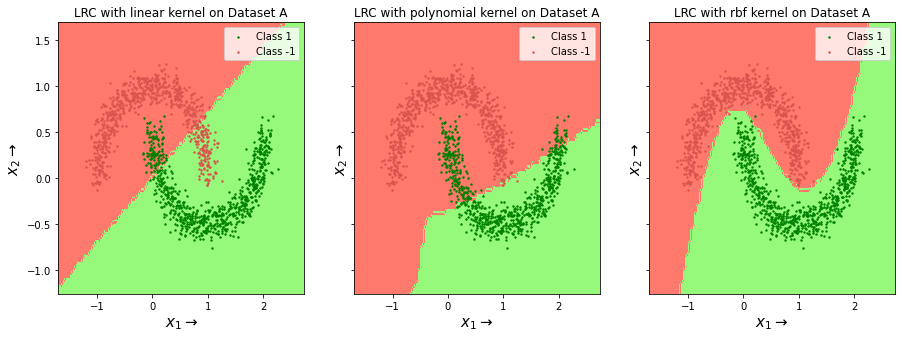

<Figure size 432x288 with 0 Axes>

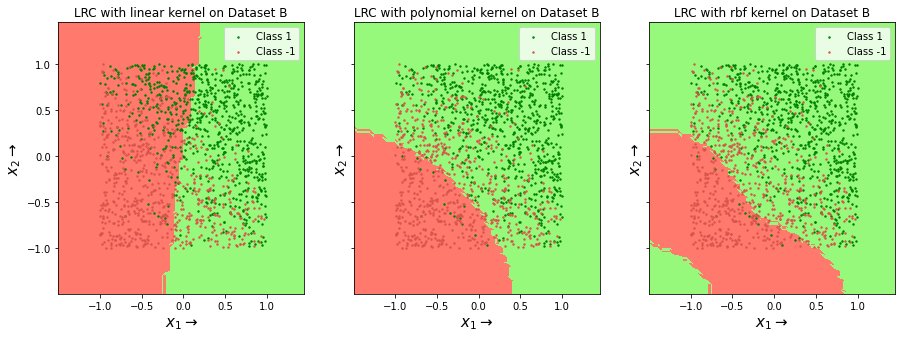

In [ ]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

data_A = np.load('dataset_A.npz')
X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']

X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])


X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel='linear', reg_param=0.0001, kernel_param=1, num_iter_gd=100)
pred_y_a = test_pred(alpha, X_train, Y_train, test_samples, kernel='linear',kernel_param= 1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel='poly', reg_param=0.001, kernel_param=3, num_iter_gd=100)
pred_y_b = test_pred(alpha, X_train, Y_train, test_samples, kernel='poly',kernel_param= 3)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel='rbf', reg_param=0.0001, kernel_param=1, num_iter_gd=100)
pred_y_c = test_pred(alpha, X_train, Y_train, test_samples, kernel='rbf',kernel_param= 1)

plt.figure(0)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax1.contourf(X,Y,pred_y_a.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('LRC with linear kernel on Dataset A')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend() 

ax2.contourf(X,Y,pred_y_b.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g', label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d', label="Class -1")
ax2.set_title('LRC with polynomial kernel on Dataset A')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend()
ax3.contourf(X,Y,pred_y_c.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g', label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d', label='Class -1')
ax3.set_title('LRC with rbf kernel on Dataset A')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.legend()
plt.show()

data_B = np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test = data_B['arr_0'],data_B['arr_1'],data_B['arr_2'],data_B['arr_3']

X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])

X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel='linear', reg_param=1, kernel_param=1, num_iter_gd=100)
pred_y_a = test_pred(alpha, X_train, Y_train, test_samples, kernel='linear',kernel_param= 1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel='poly', reg_param=0.001, kernel_param=2, num_iter_gd=100)
pred_y_b = test_pred(alpha, X_train, Y_train, test_samples, kernel='poly',kernel_param= 2)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel='rbf', reg_param=0.0001, kernel_param=4, num_iter_gd=100)
pred_y_c = test_pred(alpha, X_train, Y_train, test_samples, kernel='rbf',kernel_param= 4)

plt.figure(0)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax1.contourf(X,Y,pred_y_a.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('LRC with linear kernel on Dataset B')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend() 

ax2.contourf(X,Y,pred_y_b.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g', label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d', label="Class -1")
ax2.set_title('LRC with polynomial kernel on Dataset B')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend()
ax3.contourf(X,Y,pred_y_c.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g', label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d', label='Class -1')
ax3.set_title('LRC with rbf kernel on Dataset B')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.legend()
plt.show()

# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [ ]:
# CodeWrite cell
# Write SVM classifier using SKlearn
# write only functions here

def train_pred_svm(X, Y, X_test, kernel='linear', reg_param=0., kernel_param=1.):

  classifier = svm.SVC(C = reg_param, kernel = kernel, gamma = kernel_param)

  classifier.fit(X,Y)

  pred_y = classifier.predict(X_test)

  return pred_y


In [ ]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set. 
# Also for generating the numbers that you report below.

# the following code is for hyperparam tuning

linear_train_error = np.zeros(4)
linear_test_error = np.zeros(4)
poly_train_error = np.zeros(4)
poly_test_error = np.zeros(4)
rbf_train_error = np.zeros(4)
rbf_test_error = np.zeros(4)

data1_1 = np.load('dataset_A.npz')
X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']

kernel_param_vals = [1e-2,1e-1,1,2,3,4,5]
reg_param_vals = [1e-4,1e-3,1e-2,1e-1,1,10]
n1 = len(kernel_param_vals)
n2 = len(reg_param_vals)

linear_validation_error = np.zeros((n1,n2))
poly_validation_error = np.zeros((n1,n2))
rbf_validation_error = np.zeros((n1,n2))
X_validation = X_train[:200,:]
Y_validation = Y_train[:200]

for i in range(len(kernel_param_vals)):
  for j in range(len(reg_param_vals)):
    

      pred_y = train_pred_svm(X_train, Y_train, X_validation, kernel='linear', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i])
      
      linear_validation_error[i,j]  = 1-len(Y_validation[pred_y==Y_validation])/len(Y_validation)

      pred_y = train_pred_svm(X_train, Y_train, X_validation, kernel='poly', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i])

      poly_validation_error[i,j]  = 1-len(Y_validation[pred_y==Y_validation])/len(Y_validation)

      pred_y = train_pred_svm(X_train, Y_train, X_validation, kernel='rbf', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i])

      rbf_validation_error[i,j]  = 1-len(Y_validation[pred_y==Y_validation])/len(Y_validation)

linear_optimal_a = reg_param_vals[np.where(linear_validation_error == np.amin(linear_validation_error))[1][0]]
poly_optimal_kernel_a = kernel_param_vals[np.where(poly_validation_error == np.amin(poly_validation_error))[0][0]]
poly_optimal_reg_a = reg_param_vals[np.where(poly_validation_error == np.amin(poly_validation_error))[1][0]]
rbf_optimal_kernel_a = kernel_param_vals[np.where(rbf_validation_error == np.amin(rbf_validation_error))[0][0]]
rbf_optimal_reg_a = reg_param_vals[np.where(rbf_validation_error == np.amin(rbf_validation_error))[1][0]]

pred_y = train_pred_svm(X_train, Y_train, X_test, kernel='linear', reg_param=linear_optimal_a, kernel_param=1)
      
linear_test_error[0]  = 1-len(Y_test[pred_y==Y_test])/len(Y_test)

pred_y = train_pred_svm(X_train, Y_train, X_test, kernel='poly', reg_param=poly_optimal_reg_a, kernel_param=poly_optimal_kernel_a)

poly_test_error[0]  = 1-len(Y_test[pred_y==Y_test])/len(Y_test)

pred_y = train_pred_svm(X_train, Y_train, X_test, kernel='rbf', reg_param=rbf_optimal_reg_a, kernel_param=rbf_optimal_kernel_a)

rbf_test_error[0]  = 1-len(Y_test[pred_y==Y_test])/len(Y_test)

pred_y = train_pred_svm(X_train, Y_train, X_train, kernel='linear', reg_param=linear_optimal_a, kernel_param=1)
      
linear_train_error[0]  = 1-len(Y_train[pred_y==Y_train])/len(Y_train)

pred_y = train_pred_svm(X_train, Y_train, X_train, kernel='poly', reg_param=poly_optimal_reg_a, kernel_param=poly_optimal_kernel_a)

poly_train_error[0]  = 1-len(Y_train[pred_y==Y_train])/len(Y_train)

pred_y = train_pred_svm(X_train, Y_train, X_train, kernel='rbf', reg_param=rbf_optimal_reg_a, kernel_param=rbf_optimal_kernel_a)

rbf_train_error[0]  = 1-len(Y_train[pred_y==Y_train])/len(Y_train)

#print('dataset A',"linear error",linear_train_error[0], linear_test_error[0],"poly error",poly_train_error[0], poly_test_error[0],"rbf error",rbf_train_error[0], rbf_test_error[0])


data1_1 = np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
X_validation = X_train[:200,:]
Y_validation = Y_train[:200]

for i in range(len(kernel_param_vals)):
  for j in range(len(reg_param_vals)):

      pred_y = train_pred_svm(X_train, Y_train, X_validation, kernel='linear', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i])
      
      linear_validation_error[i,j]  = 1-len(Y_validation[pred_y==Y_validation])/len(Y_validation)

      pred_y = train_pred_svm(X_train, Y_train, X_validation, kernel='poly', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i])

      poly_validation_error[i,j]  = 1-len(Y_validation[pred_y==Y_validation])/len(Y_validation)

      pred_y = train_pred_svm(X_train, Y_train, X_validation, kernel='rbf', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i])

      rbf_validation_error[i,j]  = 1-len(Y_validation[pred_y==Y_validation])/len(Y_validation)


linear_optimal_b = reg_param_vals[np.where(linear_validation_error == np.amin(linear_validation_error))[1][0]]
poly_optimal_kernel_b = kernel_param_vals[np.where(poly_validation_error == np.amin(poly_validation_error))[0][0]]
poly_optimal_reg_b = reg_param_vals[np.where(poly_validation_error == np.amin(poly_validation_error))[1][0]]
rbf_optimal_kernel_b = kernel_param_vals[np.where(rbf_validation_error == np.amin(rbf_validation_error))[0][0]]
rbf_optimal_reg_b = reg_param_vals[np.where(rbf_validation_error == np.amin(rbf_validation_error))[1][0]]


pred_y = train_pred_svm(X_train, Y_train, X_test, kernel='linear', reg_param=linear_optimal_b, kernel_param=1)
      
linear_test_error[1]  = 1-len(Y_test[pred_y==Y_test])/len(Y_test)

pred_y = train_pred_svm(X_train, Y_train, X_test, kernel='poly', reg_param=poly_optimal_reg_b, kernel_param=poly_optimal_kernel_b)

poly_test_error[1]  = 1-len(Y_test[pred_y==Y_test])/len(Y_test)

pred_y = train_pred_svm(X_train, Y_train, X_test, kernel='rbf', reg_param=rbf_optimal_reg_b, kernel_param=rbf_optimal_kernel_b)

rbf_test_error[1]  = 1-len(Y_test[pred_y==Y_test])/len(Y_test)

pred_y = train_pred_svm(X_train, Y_train, X_train, kernel='linear', reg_param=linear_optimal_b, kernel_param=1)
      
linear_train_error[1]  = 1-len(Y_train[pred_y==Y_train])/len(Y_train)

pred_y = train_pred_svm(X_train, Y_train, X_train, kernel='poly', reg_param=poly_optimal_reg_b, kernel_param=poly_optimal_kernel_b)

poly_train_error[1]  = 1-len(Y_train[pred_y==Y_train])/len(Y_train)

pred_y = train_pred_svm(X_train, Y_train, X_train, kernel='rbf', reg_param=rbf_optimal_reg_b, kernel_param=rbf_optimal_kernel_b)

rbf_train_error[1]  = 1-len(Y_train[pred_y==Y_train])/len(Y_train)

#print('dataset B',"linear error",linear_train_error[1], linear_test_error[1],"poly error",poly_train_error[1], poly_test_error[1],"rbf error",rbf_train_error[1], rbf_test_error[1])

data1_1 = np.load('dataset_C.npz')
X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
X_validation = X_train[:200,:]
Y_validation = Y_train[:200]

for i in range(len(kernel_param_vals)):
  for j in range(len(reg_param_vals)):
    

      pred_y = train_pred_svm(X_train, Y_train, X_validation, kernel='linear', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i])
      
      linear_validation_error[i,j]  = 1-len(Y_validation[pred_y==Y_validation])/len(Y_validation)

      pred_y = train_pred_svm(X_train, Y_train, X_validation, kernel='poly', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i])

      poly_validation_error[i,j]  = 1-len(Y_validation[pred_y==Y_validation])/len(Y_validation)

      pred_y = train_pred_svm(X_train, Y_train, X_validation, kernel='rbf', reg_param=reg_param_vals[j], kernel_param=kernel_param_vals[i])

      rbf_validation_error[i,j]  = 1-len(Y_validation[pred_y==Y_validation])/len(Y_validation)



linear_optimal_c = reg_param_vals[np.where(linear_validation_error == np.amin(linear_validation_error))[1][0]]
poly_optimal_kernel_c = kernel_param_vals[np.where(poly_validation_error == np.amin(poly_validation_error))[0][0]]
poly_optimal_reg_c = reg_param_vals[np.where(poly_validation_error == np.amin(poly_validation_error))[1][0]]
rbf_optimal_kernel_c = kernel_param_vals[np.where(rbf_validation_error == np.amin(rbf_validation_error))[0][0]]
rbf_optimal_reg_c = reg_param_vals[np.where(rbf_validation_error == np.amin(rbf_validation_error))[1][0]]

pred_y = train_pred_svm(X_train, Y_train, X_test, kernel='linear', reg_param=linear_optimal_c, kernel_param=1)
      
linear_test_error[2]  = 1-len(Y_test[pred_y==Y_test])/len(Y_test)

pred_y = train_pred_svm(X_train, Y_train, X_test, kernel='poly', reg_param=poly_optimal_reg_c, kernel_param=poly_optimal_kernel_c)

poly_test_error[2]  = 1-len(Y_test[pred_y==Y_test])/len(Y_test)

pred_y = train_pred_svm(X_train, Y_train, X_test, kernel='rbf', reg_param=rbf_optimal_reg_c, kernel_param=rbf_optimal_kernel_c)

rbf_test_error[2]  = 1-len(Y_test[pred_y==Y_test])/len(Y_test)

pred_y = train_pred_svm(X_train, Y_train, X_train, kernel='linear', reg_param=linear_optimal_c, kernel_param=1)
      
linear_train_error[2]  = 1-len(Y_train[pred_y==Y_train])/len(Y_train)

pred_y = train_pred_svm(X_train, Y_train, X_train, kernel='poly', reg_param=poly_optimal_reg_c, kernel_param=poly_optimal_kernel_c)

poly_train_error[2]  = 1-len(Y_train[pred_y==Y_train])/len(Y_train)

pred_y = train_pred_svm(X_train, Y_train, X_train, kernel='rbf', reg_param=rbf_optimal_reg_c, kernel_param=rbf_optimal_kernel_c)

rbf_train_error[2]  = 1-len(Y_train[pred_y==Y_train])/len(Y_train)

#print('dataset C',"linear error",linear_train_error[2], linear_test_error[2],"poly error",poly_train_error[2], poly_test_error[2],"rbf error",rbf_train_error[2], rbf_test_error[2])



dataset A linear error 0.1286666666666667 0.134 poly error 0.06066666666666665 0.08199999999999996 rbf error 0.00666666666666671 0.0040000000000000036
dataset B linear error 0.17000000000000004 0.18799999999999994 poly error 0.17533333333333334 0.19799999999999995 rbf error 0.18533333333333335 0.19799999999999995
dataset C linear error 0.06266666666666665 0.10437710437710435 poly error 0.0 0.04040404040404044 rbf error 0.0 0.164983164983165


TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

Percentage errors and parameters - 
For linear kernel : 

Dataset | Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- |--- |---
A | 1 | 12.87 | 13.4
B | 0.01 | 17.0 | 18.79
C | 10 | 6.26 | 10.4


For poly kernel : 

Dataset | Kernel parameter |   Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- |  --- |--- |---
A | 1 | 0.1 | 6.06 | 8.19
B |4 | 0.01 | 17 | 18.79
C |0.01 | 0.001 | 0.33 | 4.7


For rbf kernel : 

Dataset | Kernel parameter | Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- | --- |--- |---
A | 1 | 0.1 | 0.66 | 0.4
B | 0.01 | 0.1 | 18.46 | 20.0
C | 0.01 | 1 | 0 | 2.3

#Observations 
**Dataset A** :
  - The data in this case is separable by a non-linear boundary. Thus, there is a clear distinction in performance of linear vs the poly and RBF kernels
  - One can notice that the regularisation parameter C is high for all the kernels (for best-performing models). This is the hard-margin SVM regime. This is because of the fact that the data is completely separable.

**Dataset B** :
  - The data in this case is not separable, regardless of the capacity of the model. One can also observe (from the plots) that an approximately linear decision boundary is what would separate the data best. This is validated by the comparable performance of all kernel choices.
  - One can notice that the C values are relatively lower for this dataset, indicating that soft-margin SVMs perform better in this case.





<Figure size 432x288 with 0 Axes>

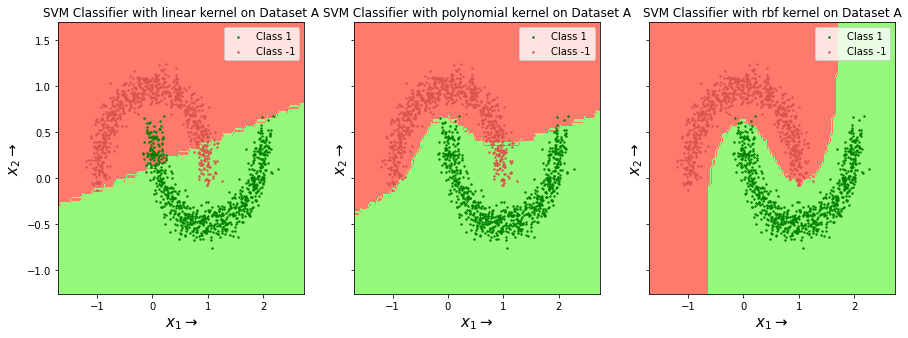

<Figure size 432x288 with 0 Axes>

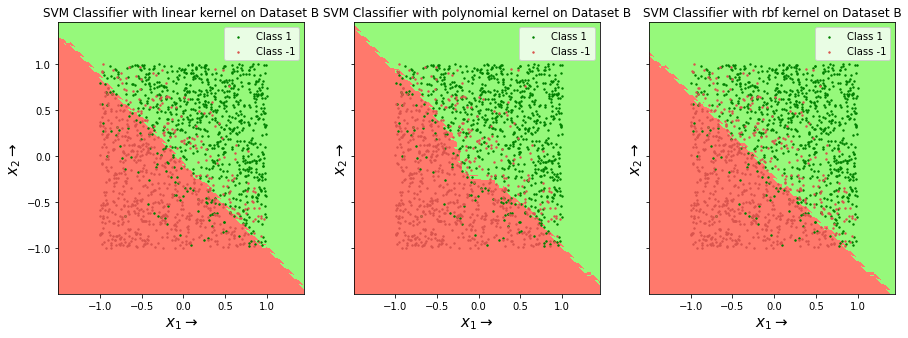

In [ ]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

data_A = np.load('dataset_A.npz')
X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']

X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])


X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
pred_y_a = train_pred_svm(X_train, Y_train, test_samples, kernel='linear', reg_param=1, kernel_param=1)
pred_y_b = train_pred_svm(X_train, Y_train, test_samples, kernel='poly', reg_param=0.1, kernel_param=1)
pred_y_c = train_pred_svm(X_train, Y_train, test_samples, kernel='rbf', reg_param=0.1, kernel_param=1)

plt.figure(0)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax1.contourf(X,Y,pred_y_a.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('SVM Classifier with linear kernel on Dataset A')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend() 

ax2.contourf(X,Y,pred_y_b.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g', label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d', label="Class -1")
ax2.set_title('SVM Classifier with polynomial kernel on Dataset A')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend()
ax3.contourf(X,Y,pred_y_c.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g', label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d', label='Class -1')
ax3.set_title('SVM Classifier with rbf kernel on Dataset A')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.legend()
plt.show()

data_B = np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test = data_B['arr_0'],data_B['arr_1'],data_B['arr_2'],data_B['arr_3']

X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])

X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
pred_y_a = train_pred_svm(X_train, Y_train, test_samples, kernel='linear', reg_param=0.01, kernel_param=1)
pred_y_b = train_pred_svm(X_train, Y_train, test_samples, kernel='poly', reg_param=0.01, kernel_param=4)
pred_y_c = train_pred_svm(X_train, Y_train, test_samples, kernel='rbf', reg_param=0.1, kernel_param=0.01)

plt.figure(0)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax1.contourf(X,Y,pred_y_a.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('SVM Classifier with linear kernel on Dataset B')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend() 

ax2.contourf(X,Y,pred_y_b.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g', label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d', label="Class -1")
ax2.set_title('SVM Classifier with polynomial kernel on Dataset B')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend()
ax3.contourf(X,Y,pred_y_c.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g', label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d', label='Class -1')
ax3.set_title('SVM Classifier with rbf kernel on Dataset B')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.legend()
plt.show()


# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [ ]:
def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):

#Returns a decision tree trained on X and Y. 
#Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
#Split criterion can be either 'accuracy' or 'entropy'.
#Returns a tree (In whatever format that you find appropriate)


  attribute_number = X.shape[1]
  min_threshold = np.zeros(attribute_number)
  max_threshold = np.zeros(attribute_number)

  for i in range(attribute_number):

    min_threshold[i] = np.min(X[:,i])
    max_threshold[i] = np.max(X[:,i])
    
  tree = {}

  split_count = 100
  node = 1
  
  Y_new = Y
  X_new = X
  nodes = 0
  Y_pos = Y_new[Y_new==1]
  min = np.inf
  while node>0:
    max = 0
    
    
    for attribute_choice in range(attribute_number):
      for i in range(split_count-1):
        step = (max_threshold[attribute_choice]-min_threshold[attribute_choice])*(i+1)/split_count
        decision_yes = Y_new[X_new[:,attribute_choice]>=min_threshold[attribute_choice]+step]
        decision_no = Y_new[X_new[:,attribute_choice]<min_threshold[attribute_choice]+step]
        decision_yes_pos = decision_yes[decision_yes==1]
        decision_no_neg = decision_no[decision_no==-1]
        acc_yes_pos = (len(decision_yes_pos)+len(decision_no_neg))
        acc_yes_neg = len(Y_new)-acc_yes_pos

        entropy = entropy_cal(len(decision_no)-len(decision_no_neg), len(decision_yes_pos), len(decision_no_neg), len(decision_yes)-len(decision_yes_pos), len(Y_new), reg=0.001)    

        if criterion == 'accuracy':
          if acc_yes_pos>acc_yes_neg:
            if acc_yes_pos>max:
              max = acc_yes_pos
              attribute_optimal = attribute_choice
              max_thres = min_threshold[attribute_choice]+step
              leaf = '1'
              nodes = len(decision_no)
              Y_new_temp = Y_new[X_new[:,attribute_choice]<min_threshold[attribute_choice]+step]
              X_new_temp = X_new[X_new[:,attribute_choice]<min_threshold[attribute_choice]+step]

          if acc_yes_neg>acc_yes_pos:
            if acc_yes_neg>max:
              max = acc_yes_neg
              attribute_optimal = attribute_choice
              max_thres = min_threshold[attribute_choice]+step
              leaf = '-1'
              nodes = len(decision_no)
              Y_new_temp = Y_new[X_new[:,attribute_choice]<min_threshold[attribute_choice]+step]
              X_new_temp = X_new[X_new[:,attribute_choice]<min_threshold[attribute_choice]+step]

        elif criterion == 'entropy':
          if entropy<min:
            min = entropy
  
            attribute_optimal = attribute_choice
            max_thres = min_threshold[attribute_choice]+step
            nodes = len(decision_no)
            Y_new_temp = Y_new[X_new[:,attribute_choice]<min_threshold[attribute_choice]+step]
            X_new_temp = X_new[X_new[:,attribute_choice]<min_threshold[attribute_choice]+step]
            if acc_yes_pos>acc_yes_neg:
              leaf = '1'
            if acc_yes_pos<acc_yes_neg:
              leaf = '-1'

    if nodes<num_nodes_stop:
      if node>1:

        tree[node] = [attribute_optimal,max_thres,'none']
        if leaf=='1':
          tree[node+3] = ['none','none','1']
          tree[node+2] = ['none','none','-1']
        if leaf=='-1':
          tree[node+3] = ['none','none','-1']
          tree[node+2] = ['none','none','1']

      if node==1:
      
        tree[node] = [attribute_optimal,max_thres,'none']
        if leaf=='1':
          tree[node+2] = ['none','none','1']
          tree[node+1] = ['none','none','-1']
        if leaf=='-1':
          tree[node+2] = ['none','none','-1']
          tree[node+1] = ['none','none','1']

      break;
    
    if node>1:

      tree[node] = [attribute_optimal,max_thres,'none']
      tree[node+3] = ['none','none',leaf]
      node = node + 2

    if node==1:
      
      tree[node] = [attribute_optimal,max_thres,'none']
      tree[node+2] = ['none','none',leaf]
      node = node + 1
    
    Y_new = Y_new_temp
    X_new = X_new_temp
    max_threshold[attribute_optimal] = max_thres
    pos_Y = Y_new[Y_new==1]
    if len(pos_Y)==0:
      tree[node] = ['none','none','-1']
      break;
    if len(pos_Y)==len(Y_new):
      tree[node] = ['none','none','1']
      break;
    
  #print(tree)
  return tree

def entropy_cal(pos_points_left, pos_points_right, neg_points_left, neg_points_right, total_points, reg=0.001):
     

        total_points_left = pos_points_left+neg_points_left
        total_points_right = neg_points_right+pos_points_right
        total_points = total_points+reg
        from numpy import log2
        if pos_points_left*neg_points_left == 0:
            entropy_left = 0
        else:
            entropy_left = -(pos_points_left/total_points_left)*log2(pos_points_left/total_points_left) - \
                (neg_points_left/total_points_left) * log2(neg_points_left/total_points_left)
        if pos_points_right*neg_points_right == 0:
            entropy_right = 0
        else:
            entropy_right = -(pos_points_right/total_points_right)*log2(pos_points_right/total_points_right) - \
                (neg_points_right/total_points_right) * log2(neg_points_right/total_points_right)
        return (total_points_left/total_points)*entropy_left + (total_points_right/total_points)*entropy_right


def eval_decision_tree(tree, test_X):

#Takes in a tree, and a bunch of instances X and 
#returns the tree predicted values at those instances.

  nodes = len(tree)
  pred_Y = np.zeros((test_X.shape[0]))

  for k in range(test_X.shape[0]):
    next_node = 1
    while next_node<=nodes :
      if tree[next_node][0]=='none':
        if tree[next_node][2]=='1':
          pred_Y[k] = 1
        if tree[next_node][2]=='-1':
          pred_Y[k] = -1
        break;
      attr_choice = tree[next_node][0]
      threshold = tree[next_node][1]
      if test_X[k,attr_choice]>= threshold:
        if next_node > 1:
          next_node = next_node + 3
        if next_node == 1:
          next_node = next_node + 2
      if test_X[k,attr_choice] < threshold:
        if next_node > 1:
          next_node = next_node + 2
        if next_node == 1:
          next_node = next_node + 1   
      
  return pred_Y


In [ ]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.
p = 0
test_err_acc = np.zeros(4)
test_err_entr = np.zeros(4)
train_err_acc = np.zeros(4)
train_err_entr = np.zeros(4)
data1_1 = np.load('dataset_A.npz')
X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
num_nodes_hyperparam = [250,300,400,500,600,700,800,900]
acc1 = np.zeros(len(num_nodes_hyperparam))
acc2 = np.zeros(len(num_nodes_hyperparam))
n = np.zeros(len(num_nodes_hyperparam))
for iter in range(len(num_nodes_hyperparam)):
  tree1 = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[iter], criterion='accuracy')
  tree2 = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[iter], criterion='entropy')
  val_X = X_train[0:200]
  val_Y = Y_train[0:200]
  pred_Y1 = eval_decision_tree(tree1, val_X)  
  acc1[iter] = 1 - len(val_Y[val_Y==pred_Y1])/len(val_Y)
  pred_Y2 = eval_decision_tree(tree2, val_X)  
  acc2[iter] = 1 - len(val_Y[val_Y==pred_Y2])/len(val_Y)

#print(acc1,acc2)
nodes_optimal_acc_a = num_nodes_hyperparam[np.where(acc1 == np.amin(acc1))[0][0]]
#print(nodes_optimal_acc_a,'p')
train_err_acc[p] = np.amin(acc1)
nodes_optimal_entr_a = num_nodes_hyperparam[np.where(acc2 == np.amin(acc2))[0][0]]
#print(nodes_optimal_entr_a,'p')
train_err_entr[p] = np.amin(acc2)
tree1 = train_decision_tree(X_train, Y_train, num_nodes_stop=nodes_optimal_acc_a, criterion='accuracy')
tree2 = train_decision_tree(X_train, Y_train, num_nodes_stop=nodes_optimal_entr_a, criterion='entropy')
pred_Y1 = eval_decision_tree(tree1, X_test)  
test_err_acc[p] = 1 - len(Y_test[Y_test==pred_Y1])/len(Y_test)
pred_Y2 = eval_decision_tree(tree2, X_test)  
test_err_entr[p] = 1 - len(Y_test[Y_test==pred_Y2])/len(Y_test)
p = p+1

data1_1 = np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
num_nodes_hyperparam = [250,300,400,500,600,700,800,900]
acc1 = np.zeros(len(num_nodes_hyperparam))
acc2 = np.zeros(len(num_nodes_hyperparam))
n = np.zeros(len(num_nodes_hyperparam))
for iter in range(len(num_nodes_hyperparam)):
  tree1 = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[iter], criterion='accuracy')
  tree2 = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[iter], criterion='entropy')
  val_X = X_train[0:200]
  val_Y = Y_train[0:200]
  pred_Y1 = eval_decision_tree(tree1, val_X)  
  acc1[iter] = 1 - len(val_Y[val_Y==pred_Y1])/len(val_Y)
  pred_Y2 = eval_decision_tree(tree2, val_X)  
  acc2[iter] = 1 - len(val_Y[val_Y==pred_Y2])/len(val_Y)

#print(acc1,acc2)
nodes_optimal_acc_b = num_nodes_hyperparam[np.where(acc1 == np.amin(acc1))[0][0]]
train_err_acc[p] = np.amin(acc1)
nodes_optimal_entr_b = num_nodes_hyperparam[np.where(acc2 == np.amin(acc2))[0][0]]
train_err_entr[p] = np.amin(acc2)
tree1 = train_decision_tree(X_train, Y_train, num_nodes_stop=nodes_optimal_acc_b, criterion='accuracy')
tree2 = train_decision_tree(X_train, Y_train, num_nodes_stop=nodes_optimal_entr_b, criterion='entropy')
pred_Y1 = eval_decision_tree(tree1, X_test)  
test_err_acc[p] = 1 - len(Y_test[Y_test==pred_Y1])/len(Y_test)
pred_Y2 = eval_decision_tree(tree2, X_test)  
test_err_entr[p] = 1 - len(Y_test[Y_test==pred_Y2])/len(Y_test)
p = p+1

data1_1 = np.load('dataset_C.npz')
X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
num_nodes_hyperparam = [100,200,250,300,400,500,600,700,800,900]
acc1 = np.zeros(len(num_nodes_hyperparam))
acc2 = np.zeros(len(num_nodes_hyperparam))
n = np.zeros(len(num_nodes_hyperparam))
for iter in range(len(num_nodes_hyperparam)):
  tree1 = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[iter], criterion='accuracy')
  tree2 = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[iter], criterion='entropy')
  val_X = X_train[0:200]
  val_Y = Y_train[0:200]
  pred_Y1 = eval_decision_tree(tree1, val_X)  
  acc1[iter] = 1 - len(val_Y[val_Y==pred_Y1])/len(val_Y)
  pred_Y2 = eval_decision_tree(tree2, val_X)  
  acc2[iter] = 1 - len(val_Y[val_Y==pred_Y2])/len(val_Y)

#print(acc1,acc2)
nodes_optimal_acc_c = num_nodes_hyperparam[np.where(acc1 == np.amin(acc1))[0][0]]
train_err_acc[p] = np.amin(acc1)
nodes_optimal_entr_c = num_nodes_hyperparam[np.where(acc2 == np.amin(acc2))[0][0]]
train_err_entr[p] = np.amin(acc2)
tree1 = train_decision_tree(X_train, Y_train, num_nodes_stop=nodes_optimal_acc_c, criterion='accuracy')
tree2 = train_decision_tree(X_train, Y_train, num_nodes_stop=nodes_optimal_entr_c, criterion='entropy')
pred_Y1 = eval_decision_tree(tree1, X_test)  
test_err_acc[p] = 1 - len(Y_test[Y_test==pred_Y1])/len(Y_test)
pred_Y2 = eval_decision_tree(tree2, X_test)  
test_err_entr[p] = 1 - len(Y_test[Y_test==pred_Y2])/len(Y_test)
p = p+1

data1_1 = np.load('dataset_D.npz')
X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
num_nodes_hyperparam = [30,50,100,200,250,300,400,500,600,700,800,900]
acc1 = np.zeros(len(num_nodes_hyperparam))
acc2 = np.zeros(len(num_nodes_hyperparam))
n = np.zeros(len(num_nodes_hyperparam))
for iter in range(len(num_nodes_hyperparam)):
  tree1 = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[iter], criterion='accuracy')
  tree2 = train_decision_tree(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[iter], criterion='entropy')
  val_X = X_train[0:200]
  val_Y = Y_train[0:200]
  pred_Y1 = eval_decision_tree(tree1, val_X)  
  acc1[iter] = 1 - len(val_Y[val_Y==pred_Y1])/len(val_Y)
  pred_Y2 = eval_decision_tree(tree2, val_X)  
  acc2[iter] = 1 - len(val_Y[val_Y==pred_Y2])/len(val_Y)

#print(acc1,acc2)
nodes_optimal_acc_d = num_nodes_hyperparam[np.where(acc1 == np.amin(acc1))[0][0]]
train_err_acc[p] = np.amin(acc1)
nodes_optimal_entr_d = num_nodes_hyperparam[np.where(acc2 == np.amin(acc2))[0][0]]
train_err_entr[p] = np.amin(acc2)
tree1 = train_decision_tree(X_train, Y_train, num_nodes_stop=nodes_optimal_acc_d, criterion='accuracy')
tree2 = train_decision_tree(X_train, Y_train, num_nodes_stop=nodes_optimal_entr_d, criterion='entropy')
pred_Y1 = eval_decision_tree(tree1, X_test)  
test_err_acc[p] = 1 - len(Y_test[Y_test==pred_Y1])/len(Y_test)
pred_Y2 = eval_decision_tree(tree2, X_test)  
test_err_entr[p] = 1 - len(Y_test[Y_test==pred_Y2])/len(Y_test)

TextWrite cell: Give your observations and the list of hyperparameter choices 

---

and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

When accuracy is the criterion used : 

Dataset | Stopping node choice | Train zero-one error | Test zero-one error
--- |--- |--- |---
A | 250 | 7.5 | 12.6
B | 400 | 25 | 27.2
C | 100 | 9 | 21.8
D | 30 | 5.5 | 13.6

When entropy is the criterion used : 

Dataset | Stopping node choice | Train zero-one error | Test zero-one error
--- |--- |--- |---
A |250| 21 | 20
B | 600| 19.5 | 22.4
C | 900|12.5 | 25.25
D | 30| 8 | 30.17



## Observations
- The training error is minimum when num_nodes_stop is set to 1 irrespective of the dataset. Also, the training error is zero for this setting. This is a property of decision trees, ie, they can always be made to perfectly fit the training data.
- As we can see however, this setting often does not lead to the best performance in the validation set as we are overfitting the training data.

- Given the amount of overlap between positive and negative points in dataset B, unless a well designed feature mapping is used, we cannot get good separation. Since no such feature mapping is used in decision trees, the error rates are always high.
- Also, the best separation for dataset B, from the other classifiers, appears to be a diagonal separator. However, decision trees can make only horizontal or vertical boundaries. We need an infinite number of decision thresholds to model a smooth diagonal line like that. Hence decision trees are not able to model the boundary completely and perform the worst among the classifiers. 
hyperplane as the ideal separator from our observations earlier. 
- It is hard to make claims about dataset C and D as it is high dimensional and cannot be plotted.

<Figure size 432x288 with 0 Axes>

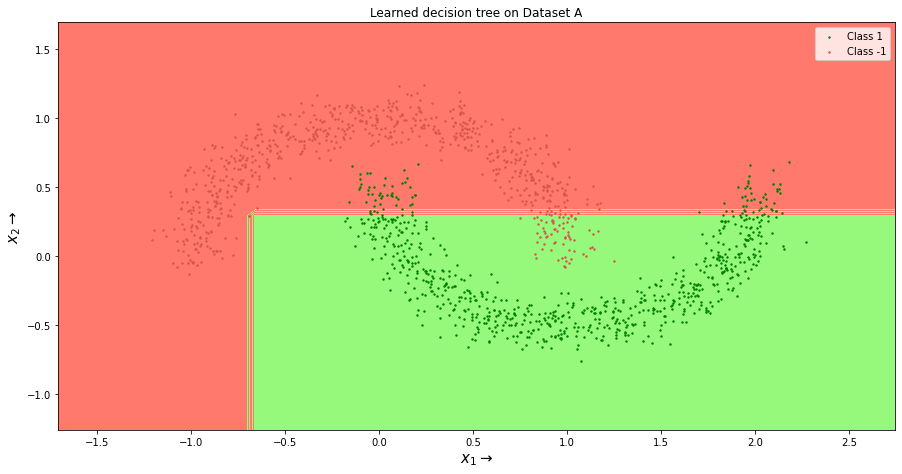

<Figure size 432x288 with 0 Axes>

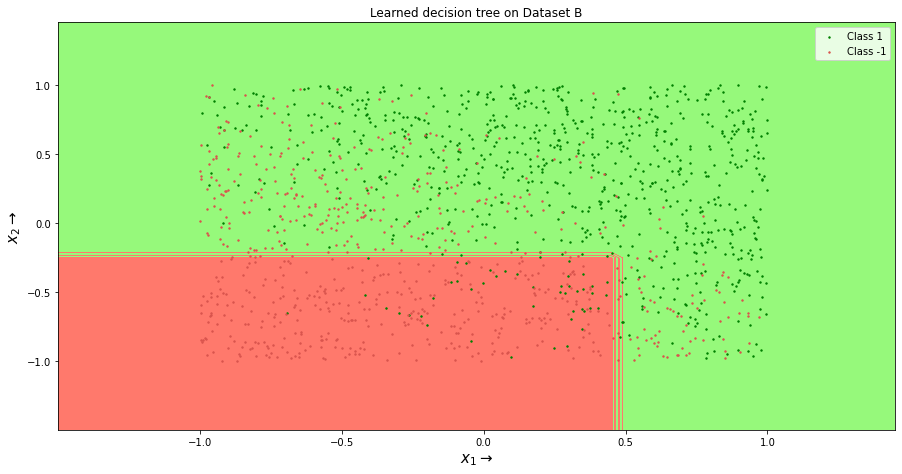

In [ ]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

data_A = np.load('dataset_A.npz')
X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']

X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])


X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
tree = train_decision_tree(X_train, Y_train, num_nodes_stop=nodes_optimal_acc_a, criterion='accuracy')
pred_Y = eval_decision_tree(tree, test_samples)

plt.figure(0)
f, (ax1) = plt.subplots(1,1,sharex=False,sharey=True,figsize=(15,7.5))
ax1.contourf(X,Y,pred_Y.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('Learned decision tree on Dataset A')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend() 
plt.show()

data_B = np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test = data_B['arr_0'],data_B['arr_1'],data_B['arr_2'],data_B['arr_3']

X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])


X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
tree = train_decision_tree(X_train, Y_train, num_nodes_stop=nodes_optimal_acc_b, criterion='accuracy')
pred_Y = eval_decision_tree(tree, test_samples)

plt.figure(1)
f, (ax1) = plt.subplots(1,1,sharex=False,sharey=True,figsize=(15,7.5))
ax1.contourf(X,Y,pred_Y.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('Learned decision tree on Dataset B')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend() 
plt.show()

# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [ ]:
# CodeWrite cell
# Write Random Forest classifier. 


from random import seed
from random import randrange
from math import sqrt

def split(val,rownum, data):
  dec_l,dec_r=list(),list()
  for entry in data:
    if entry[rownum]<val:
      dec_l.append(entry)
    else:
      dec_r.append(entry)
  return dec_l, dec_r

def entropy_cal(subsets, sets):
  samples = float(sum([len(subset) for subset in subsets]))
  entropy=0
  for subset in subsets:
    i = float(len(subset))
    if i==0:
      continue
    score = 0.0
    for ind_class in sets:
      p = [row[-1] for row in subset].count(ind_class) / i
      score += p * p
    entropy += (1.0-score)*(i/samples)
  return entropy
          
def best_split(no_of_feature, data):
  vals = list(set(row[-1] for row in data))
  best_ind = 999
  best_v = 999
  best_sc = 999
  best_s = None
  list_of_features = list()
  while len(list_of_features)<no_of_feature:
    i = randrange(len(data[0])-1)
    if i not in list_of_features:
      list_of_features.append(i)
  for j in list_of_features:
    for k in data:
      split_data = split(k[j], j, data)
      entpy = entropy_cal(split_data,vals)
      if entpy<best_sc:
        best_ind = j
        best_v = k[j]
        best_sc = entpy
        best_s = split_data
  return {'index':best_ind,'value':best_v,'groups':best_s}
  
def node_terminal(split_data):
  numb  = [row[-1] for row in split_data]
  return max(set(numb), key=numb.count)

def child_splits(max_depth,depth,min_size,no_of_features,node):
  left, right = node['groups']
  del(node['groups'])
  if not left or not right:
    node['left'] = node['right'] = node_terminal(left+right)
    return
  if depth>=max_depth:
    node['left'] = node_terminal(left)
    node['right'] = node_terminal(right)
    return
  if len(left)<=min_size:
    node['left'] = node_terminal(left)
  else:
    node['left'] = best_split(no_of_features, left)
    child_splits(max_depth,depth+1,min_size,no_of_features,node['left'])
  if len(right)<=min_size:
    node['right'] = node_terminal(right)
  else:
    node['right'] = best_split(no_of_features, right)
    child_splits(max_depth,depth+1,min_size,no_of_features,node['right'])

def decision_tree(no_of_features,maximum_depth,minimum_size,data):
  get_root = best_split(no_of_features,data)
  child_splits(maximum_depth,1,minimum_size,no_of_features,get_root)
  return get_root

def decision_tree_predict(node, row):
  if row[node['index']]<node['value']:
    if isinstance(node['left'], dict):
      return decision_tree_predict(node['left'], row)
    else:
      return node['left']
  else:
    if isinstance(node['right'], dict):
      return decision_tree_predict(node['right'], row)
    else:
      return node['right']

def sampling(ratio, data):
  list_of_samples = list()
  sample_ind = round(len(data)*ratio)
  while len(list_of_samples) < sample_ind:
    i = randrange(len(data))
    list_of_samples.append(data[i])
  return list_of_samples

def bagging(trees_trained, index):
  pred = [decision_tree_predict(t,index) for t in trees_trained]
  pred_f = max(set(pred), key = pred.count)
  return pred_f


def random_forest_predictions(data, test_data,notrees,nofeatures,minimum_size,sample_size,maximum_depth):
  trees = list()
  for i in range(notrees):
    samples = sampling(sample_size,data)
    dt = decision_tree(nofeatures,maximum_depth,minimum_size,data)
    trees.append(dt)
  pred = [bagging(trees,ind) for ind in test_data]
  return(pred)
      
def run_random_forest(data,testdata,rf,*args):
  predict_results = rf(data,testdata,*args)
  test_labels = [entry[-1] for entry in testdata]
  count = 0
  for i in range(len(test_labels)):
    if predict_results[i] == test_labels[i]:
      count = count + 1
  accuracy = count/float(len(test_labels))*100.0
  return predict_results, accuracy

def npz_to_data(traindata,trainlabels):
  for i in range(len(trainlabels)):
    if trainlabels[i]==-1:
      trainlabels[i] = trainlabels[i]+1
  trainlabels = trainlabels.astype(int)
  traindata=traindata.astype(float)
  dataset = np.column_stack((traindata,trainlabels))
  dataset = dataset.tolist()
  for i in range(len(dataset)):
    dataset[i][len(dataset[0])-1]=int(dataset[i][len(dataset[0])-1])
  return dataset


# def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1, 
#                         criterion='accuracy', a=0.5, b=0.5):
# """ Returns a random forest trained on X and Y. 
# Trains num_trees.
# Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
# Split criterion can be either 'accuracy' or 'entropy'.
# Fraction of data used per tree = a
# Fraction of features used in each node = b
# Returns a random forest (In whatever format that you find appropriate)
# """
    

# def eval_random_forest(random_forest, test_X):
# """ Takes in a  random forest object (hhowever you want to store it), and a bunch of instances X and 
# returns the tree predicted values at those instances."""




In [ ]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.
data1 = np.load('dataset_A.npz', mmap_mode='r')
X_train1= data1['arr_0']
Y_train1= data1['arr_1']
X_test1=data1['arr_2']
Y_test1=data1['arr_3']
datatrain=npz_to_data(X_train1,Y_train1)
datatest=npz_to_data(X_test1,Y_test1)
min_size = 1
sample_size = 0.5
n_features = int(sqrt(len(datatrain[0])-1))
# print('FOR DATASET A')
for max_depth in [1, 3, 5, 7, 10, 12]:
  # print("Maximum depth is %s" % max_depth)
  for n_trees in [1,5,10,15,20]:
      predresults, accuracy = run_random_forest(datatrain, datatest, random_forest_predictions, n_trees,n_features,min_size,sample_size,max_depth)
      # print('Trees: %d' % n_trees)
      # print('accuracy: %s' % accuracy)
#print("########################################################################")
data1 = np.load('dataset_B.npz', mmap_mode='r')
X_train1= data1['arr_0']
Y_train1= data1['arr_1']
X_test1=data1['arr_2']
Y_test1=data1['arr_3']
datatrain=npz_to_data(X_train1,Y_train1)
datatest=npz_to_data(X_test1,Y_test1)
min_size = 1
sample_size = 0.5
n_features = int(sqrt(len(datatrain[0])-1))
# print('FOR DATASET B')
for max_depth in [1, 3, 5, 7, 10, 12]:
  # print("Maximum depth is %s" % max_depth)
  for n_trees in [1,5,10,15,20]:
      predresults, accuracy = run_random_forest(datatrain, datatest, random_forest_predictions, n_trees,n_features,min_size,sample_size,max_depth)
      # print('Trees: %d' % n_trees)
      # print('accuracy: %s' % accuracy)

#print("########################################################################")
data1 = np.load('dataset_C.npz', mmap_mode='r')
X_train1= data1['arr_0']
Y_train1= data1['arr_1']
X_test1=data1['arr_2']
Y_test1=data1['arr_3']
datatrain=npz_to_data(X_train1,Y_train1)
datatest=npz_to_data(X_test1,Y_test1)
min_size = 1
sample_size = 0.5
n_features = int(sqrt(len(datatrain[0])-1))
#print('FOR DATASET C')
for max_depth in [1, 3, 5, 7, 10, 12]:
  #print("Maximum depth is %s" % max_depth)
  for n_trees in [1,5,10,15,20]:
      predresults, accuracy = run_random_forest(datatrain, datatest, random_forest_predictions, n_trees,n_features,min_size,sample_size,max_depth)
      # print('Trees: %d' % n_trees)
      # print('accuracy: %s' % accuracy)

#print("########################################################################")
data1 = np.load('dataset_D.npz', mmap_mode='r')
X_train1= data1['arr_0']
Y_train1= data1['arr_1']
X_test1=data1['arr_2']
Y_test1=data1['arr_3']
datatrain=npz_to_data(X_train1,Y_train1)
datatest=npz_to_data(X_test1,Y_test1)
min_size = 1
sample_size = 0.5
n_features = int(sqrt(len(datatrain[0])-1))
# print('FOR DATASET D')
for max_depth in [1, 3, 5, 7, 10, 12]:
  # print("Maximum depth is %s" % max_depth)
  for n_trees in [1,5,10,15,20]:
      predresults, accuracy = run_random_forest(datatrain, datatest, random_forest_predictions, n_trees,n_features,min_size,sample_size,max_depth)
      # print('Trees: %d' % n_trees)
      # print('accuracy: %s' % accuracy)


FOR DATASET A
Maximum depth is 1
Trees: 1
accuracy: 82.39999999999999
Trees: 5
accuracy: 71.8
Trees: 10
accuracy: 71.8
Trees: 15
accuracy: 82.39999999999999
Trees: 20
accuracy: 87.0
Maximum depth is 3
Trees: 1
accuracy: 87.0
Trees: 5
accuracy: 88.8
Trees: 10
accuracy: 88.0
Trees: 15
accuracy: 88.8
Trees: 20
accuracy: 90.2
Maximum depth is 5
Trees: 1
accuracy: 89.2
Trees: 5
accuracy: 96.2
Trees: 10
accuracy: 96.39999999999999
Trees: 15
accuracy: 90.2
Trees: 20
accuracy: 90.2
Maximum depth is 7
Trees: 1
accuracy: 97.2
Trees: 5
accuracy: 97.6
Trees: 10
accuracy: 98.0
Trees: 15
accuracy: 98.0
Trees: 20
accuracy: 98.4
Maximum depth is 10
Trees: 1
accuracy: 97.2
Trees: 5
accuracy: 98.2
Trees: 10
accuracy: 98.2
Trees: 15
accuracy: 98.0
Trees: 20
accuracy: 98.2
Maximum depth is 12
Trees: 1
accuracy: 97.6
Trees: 5
accuracy: 98.8
Trees: 10
accuracy: 98.4
Trees: 15
accuracy: 98.0
Trees: 20
accuracy: 98.2
########################################################################
FOR DATASET B
Maximu

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

For entropy criteria

Dataset | No. of trees | Max no. of nodes | Accuracy
--- |--- |--- |---
A | 5 | 12 | 98.8
B | 20 | 3 | 79.6
C | 20 |7 | 96.29
D | 5 | 10 | 98.81


## Observations

- Higher number of trees lead to more number of decision boundaries and higher number of nodes lead to more slope changes, indicating ragged decision boundaries.
- for dataset A, as the data is clustered, therefore scope for clear decision boundary is achieved by larger no of nodes by making decision boundary ragged, and gives better accuracy on test data (also based on plots after next cell)
- For dataset B, data mixed a lot, not very clustered tendency, so more number of trees give more decision boundaries, and thus gives better accuracies on test data. 
- It is hard to make claims about dataset C and D as it is high dimensional and cannot be plotted.
- From empirical studies num_features = squareroot(total features) -1 gives the best results and has been used for this study.


Green line shows the decision boundary


<Figure size 432x288 with 0 Axes>

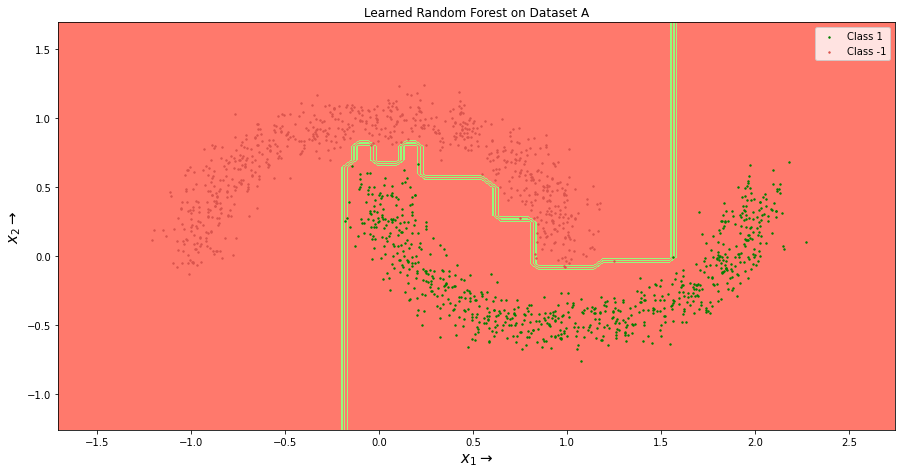

<Figure size 432x288 with 0 Axes>

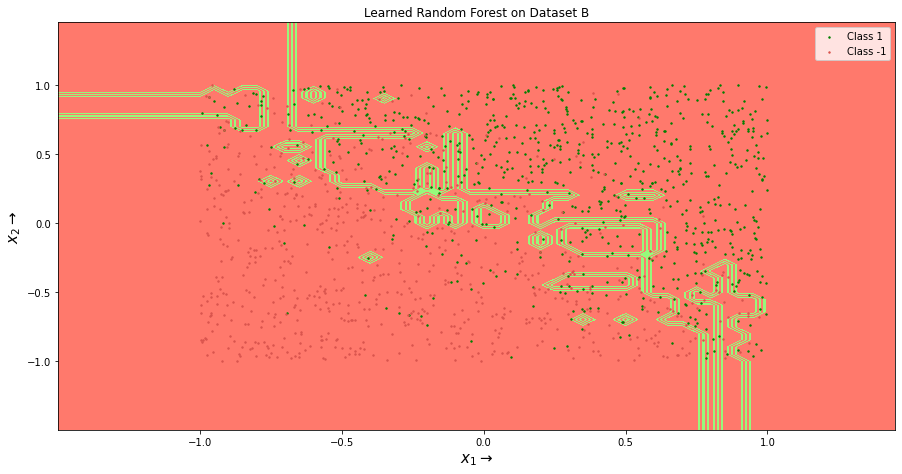

In [ ]:
# Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

# print("Green line shows the decision boundary")
data1 = np.load('dataset_A.npz', mmap_mode='r')
X_train1= data1['arr_0'] #X array
Y_train1= data1['arr_1'] 
X_test1=data1['arr_2']
Y_test1=data1['arr_3']
datatrain=npz_to_data(X_train1,Y_train1)
max_depth = 12
min_size = 1
sample_size = 0.5
n_features = int(sqrt(len(datatrain[0])-1))
n_trees = 5
#Z array
predf = np.asarray(random_forest_predictions(npz_to_data(np.column_stack((X_train1[:,0], X_train1[:,1])), Y_train1), npz_to_data(np.column_stack((X_train1[:,0], X_train1[:,1])), Y_train1), n_trees,n_features,min_size,sample_size,max_depth))
#contourplot and scatter
data_B = data1
X_train, Y_train, X_test, Y_test = data_B['arr_0'],data_B['arr_1'],data_B['arr_2'],data_B['arr_3']

X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])


X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
h = np.zeros((len(test_samples),))
h.shape
tdplot = npz_to_data(test_samples,h)
predf = np.asarray(random_forest_predictions(npz_to_data(np.column_stack((X_train1[:,0], X_train1[:,1])), Y_train1), tdplot, n_trees,n_features,min_size,sample_size,max_depth))
plt.figure(1)
f, (ax1) = plt.subplots(1,1,sharex=False,sharey=True,figsize=(15,7.5))
ax1.contourf(X,Y,predf.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('Learned Random Forest on Dataset A')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend() 
plt.show()

data1 = np.load('dataset_B.npz', mmap_mode='r')
X_train1= data1['arr_0'] #X array
Y_train1= data1['arr_1'] 
X_test1=data1['arr_2']
Y_test1=data1['arr_3']
datatrain=npz_to_data(X_train1,Y_train1)
max_depth = 10
min_size = 1
sample_size = 0.5
n_features = int(sqrt(len(datatrain[0])-1))
n_trees = 10
#Z array
predf = np.asarray(random_forest_predictions(npz_to_data(np.column_stack((X_train1[:,0], X_train1[:,1])), Y_train1), npz_to_data(np.column_stack((X_train1[:,0], X_train1[:,1])), Y_train1), n_trees,n_features,min_size,sample_size,max_depth))
#contourplot and scatter
data_B = data1
X_train, Y_train, X_test, Y_test = data_B['arr_0'],data_B['arr_1'],data_B['arr_2'],data_B['arr_3']

X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])


X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
h = np.zeros((len(test_samples),))
h.shape
tdplot = npz_to_data(test_samples,h)
predf = np.asarray(random_forest_predictions(npz_to_data(np.column_stack((X_train1[:,0], X_train1[:,1])), Y_train1), tdplot, n_trees,n_features,min_size,sample_size,max_depth))

plt.figure(1)
f, (ax1) = plt.subplots(1,1,sharex=False,sharey=True,figsize=(15,7.5))
ax1.contourf(X,Y,predf.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('Learned Random Forest on Dataset B')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend() 
plt.show()


# 5 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree 
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  plot the train and test accuracy vs epochs. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [ ]:
# Codewrite cell
# Write code to run here (no plotting)




def one_node_tree(X, Y, X_test):  

  d = X.shape[1]
  min_thres = np.zeros((d,1))
  max_thres = np.zeros((d,1))
  for attr in range(d):
    min_thres[attr] = np.min(X[:,attr])
    max_thres[attr] = np.max(X[:,attr])

  split_count = 100
  tree = {}
  max = 0
  for attr in range(d):
    for i in range(split_count-1):
      step = (max_thres[attr]-min_thres[attr])*(i+1)/split_count
      decision_yes = Y[X[:,attr]>=min_thres[attr]+step]
      decision_no = Y[X[:,attr]<min_thres[attr]+step]
      decision_yes_pos = decision_yes[decision_yes==1]
      decision_no_neg = decision_no[decision_no==-1]
      acc_yes_pos = (len(decision_yes_pos)+len(decision_no_neg))/len(Y)
      acc_yes_neg = 1-acc_yes_pos

      if acc_yes_pos>acc_yes_neg:
        if acc_yes_pos>max:
          max = acc_yes_pos
          attribute_optimal = attr
          max_thresh = min_thres[attr]+step
          leaf = 1

      if acc_yes_neg>acc_yes_pos:
        if acc_yes_neg>max:
          max = acc_yes_neg
          attribute_optimal = attr
          max_thresh = min_thres[attr]+step
          leaf = -1

  n = X_test.shape[0]
  pred_y_test = np.zeros((n,1))
  for i in range(n):
    if X_test[i][attribute_optimal]>=max_thresh:
      pred_y_test[i] = leaf
    if X_test[i][attribute_optimal]<max_thresh:
      pred_y_test[i] = -1*leaf

  n = X.shape[0]
  pred_y_train = np.zeros((n,1))
  for i in range(n):
    if X[i][attribute_optimal]>max_thresh:
      pred_y_train[i] = leaf
    if X[i][attribute_optimal]<max_thresh:
      pred_y_train[i] = -1*leaf

  return pred_y_test.reshape(-1,1), pred_y_train.reshape(-1,1)

def weak_learner2and3(X, Y,max_nodes):

#Returns a decision tree trained on X and Y. 
#Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
#Split criterion can be either 'accuracy' or 'entropy'.
#Returns a tree (In whatever format that you find appropriate)


  attribute_number = X.shape[1]
  min_threshold = np.zeros(attribute_number)
  max_threshold = np.zeros(attribute_number)

  for i in range(attribute_number):

    min_threshold[i] = np.min(X[:,i])
    max_threshold[i] = np.max(X[:,i])
    
  tree = {}

  split_count = 50
  node = 1
  
  Y_new = Y
  X_new = X
  nodes = 0
  while node>0:
    max = 0
    for attribute_choice in range(attribute_number):
      for i in range(split_count-1):
        step = (max_threshold[attribute_choice]-min_threshold[attribute_choice])*(i+1)/split_count
        decision_yes = Y_new[X_new[:,attribute_choice]>=min_threshold[attribute_choice]+step]
        decision_no = Y_new[X_new[:,attribute_choice]<min_threshold[attribute_choice]+step]
        decision_yes_pos = decision_yes[decision_yes==1]
        decision_no_neg = decision_no[decision_no==-1]
        acc_yes_pos = (len(decision_yes_pos)+len(decision_no_neg))
        acc_yes_neg = len(Y_new)-acc_yes_pos

        
        if acc_yes_pos>acc_yes_neg:
          if acc_yes_pos>max:
              max = acc_yes_pos
              attribute_optimal = attribute_choice
              max_thres = min_threshold[attribute_choice]+step
              leaf = '1'
              Y_new_temp = Y_new[X_new[:,attribute_choice]<min_threshold[attribute_choice]+step]
              X_new_temp = X_new[X_new[:,attribute_choice]<min_threshold[attribute_choice]+step]

        if acc_yes_neg>acc_yes_pos:
          if acc_yes_neg>max:
              max = acc_yes_neg
              attribute_optimal = attribute_choice
              max_thres = min_threshold[attribute_choice]+step
              leaf = '-1'
              
              Y_new_temp = Y_new[X_new[:,attribute_choice]<min_threshold[attribute_choice]+step]
              X_new_temp = X_new[X_new[:,attribute_choice]<min_threshold[attribute_choice]+step]

    if node >= max_nodes:
      
      tree[node] = [attribute_optimal,max_thres,'none']
      if leaf=='1':
        tree[node+3] = ['none','none','1']
        tree[node+2] = ['none','none','-1']
      if leaf=='-1':
        tree[node+3] = ['none','none','-1']
        tree[node+2] = ['none','none','1']

      break;
    
    if node>1:

      tree[node] = [attribute_optimal,max_thres,'none']
      tree[node+3] = ['none','none',leaf]
      node = node + 2

    if node==1:
      
      tree[node] = [attribute_optimal,max_thres,'none']
      tree[node+2] = ['none','none',leaf]
      node = node + 1
    
    Y_new = Y_new_temp
    X_new = X_new_temp
    max_threshold[attribute_optimal] = max_thres
        
  

  return tree

def eval_decision_tree(tree, test_X):

#Takes in a tree, and a bunch of instances X and 
#returns the tree predicted values at those instances.

  nodes = len(tree)
  pred_Y = np.zeros((test_X.shape[0]))

  for k in range(test_X.shape[0]):
    next_node = 1
    while next_node<=nodes :
      if tree[next_node][0]=='none':
        if tree[next_node][2]=='1':
          pred_Y[k] = 1
        if tree[next_node][2]=='-1':
          pred_Y[k] = -1
        break;
      attr_choice = tree[next_node][0]
      threshold = tree[next_node][1]
      if test_X[k,attr_choice]>= threshold:
        if next_node > 1:
          next_node = next_node + 3
        if next_node == 1:
          next_node = next_node + 2
      if test_X[k,attr_choice] < threshold:
        if next_node > 1:
          next_node = next_node + 2
        if next_node == 1:
          next_node = next_node + 1   
      
  return pred_Y.reshape(-1,1)

def adaboost(X_train, Y_train, X_test, Y_test, iter, learner_choice):

  n_orig = X_train.shape[0]
  weights = np.ones(n_orig)
  sum_train = np.zeros((n_orig,1))
  sum_test = np.zeros((X_test.shape[0],1))
  test_err = np.zeros((iter,1))
  train_err = np.zeros((iter,1))

  
  X_new = X_train
  Y_new = Y_train
  for t in range(iter):
      if learner_choice == 1:
        pred_y_test, pred_y_train = one_node_tree(X_new, Y_new, X_test)
      elif learner_choice == 2:
        tree = weak_learner2and3(X_new, Y_new,3)
        pred_y_test = eval_decision_tree(tree,X_test)
        pred_y_train = eval_decision_tree(tree,X_new)
      elif learner_choice == 3:
        tree = weak_learner2and3(X_new, Y_new,7)
        pred_y_test = eval_decision_tree(tree,X_test)
        pred_y_train = eval_decision_tree(tree,X_new)
      gamma = (len(Y_new[Y_new==pred_y_train]))/len(Y_new) - 0.5
      beta = (0.5+gamma)/(0.5-gamma)
      for i in range(len(weights)):
        weights[i] *= beta**(0.5*abs(pred_y_train[i]-Y_new[i]))
      weights = np.round_(weights)
      X_new_temp = X_new 
      Y_new_temp = Y_new.reshape(-1,1)
      for i in range(n_orig):
        if weights[i]>1:
          a = np.repeat(X_new[i,:].reshape(-1,1).T,int(weights[i]),axis = 0)
          b = np.repeat(Y_new[i,:].reshape(-1,1).T,int(weights[i]),axis = 0)
          X_new_temp = np.vstack((X_new_temp,a))
          Y_new_temp = np.vstack((Y_new_temp,b))
      X_new = X_new_temp
      Y_new = Y_new_temp
      
      
      sum_test += np.log(beta)*pred_y_test
      sum_train += np.log(beta)*pred_y_train[:n_orig]
      y_comb_test = np.sign(sum_test)
      y_comb_train = np.sign(sum_train)
      test_err[t] = 1 - (len(Y_test[Y_test == y_comb_test]))/len(Y_test)
      Y_orig = Y_train[:n_orig].reshape(-1,1)
      train_err[t] = 1 - (len(Y_orig[Y_orig == y_comb_train]))/n_orig

  return test_err, train_err, y_comb_test
    
    

<Figure size 432x288 with 0 Axes>

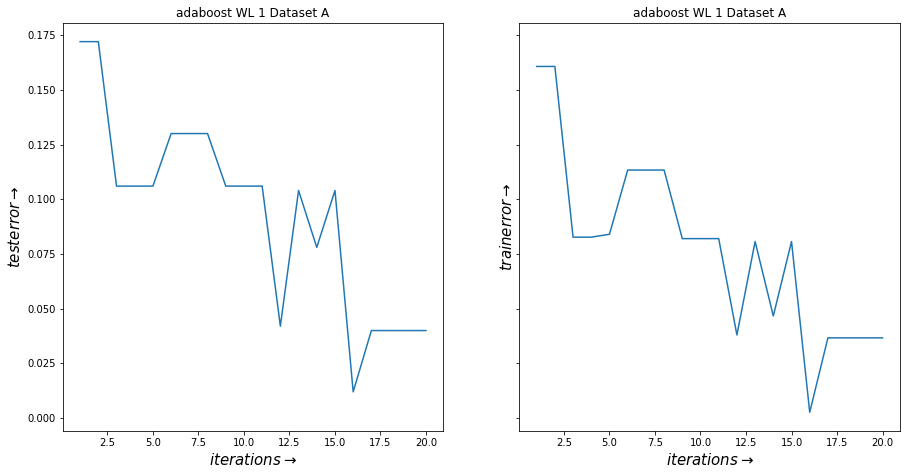

<Figure size 432x288 with 0 Axes>

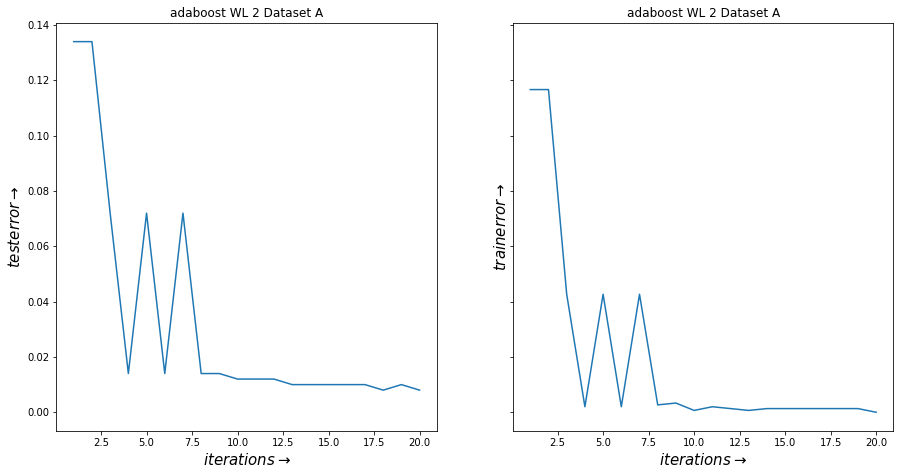

<Figure size 432x288 with 0 Axes>

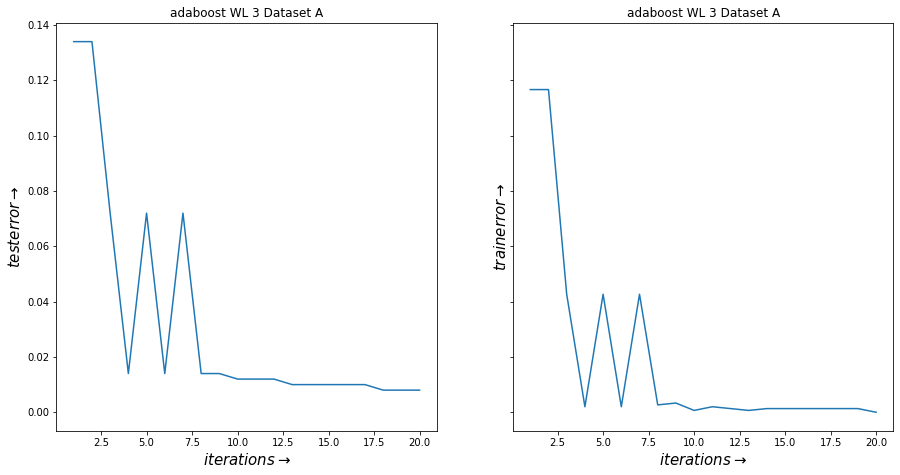

<Figure size 432x288 with 0 Axes>

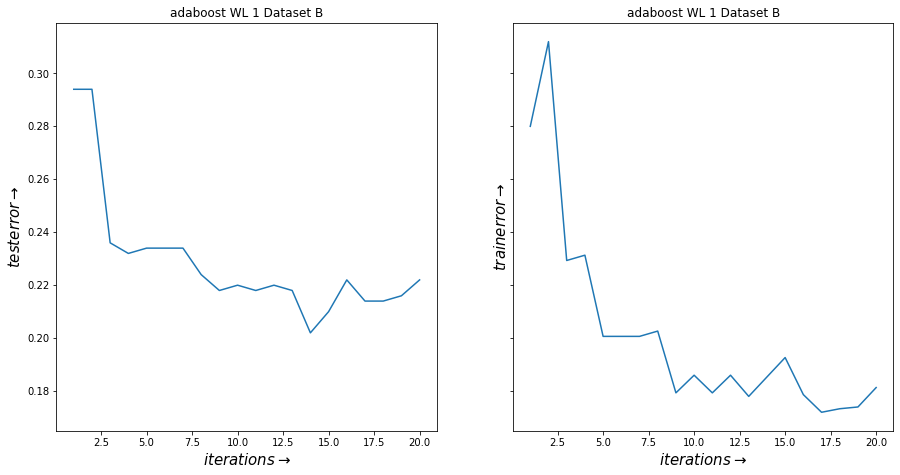

<Figure size 432x288 with 0 Axes>

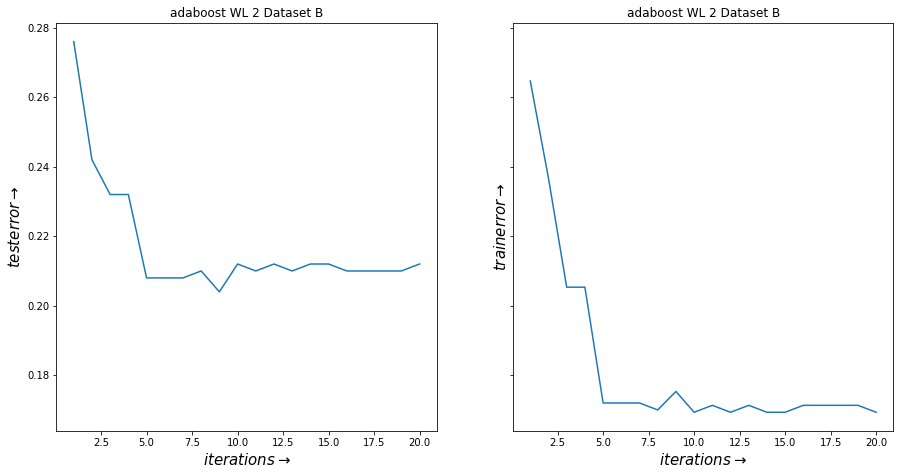

<Figure size 432x288 with 0 Axes>

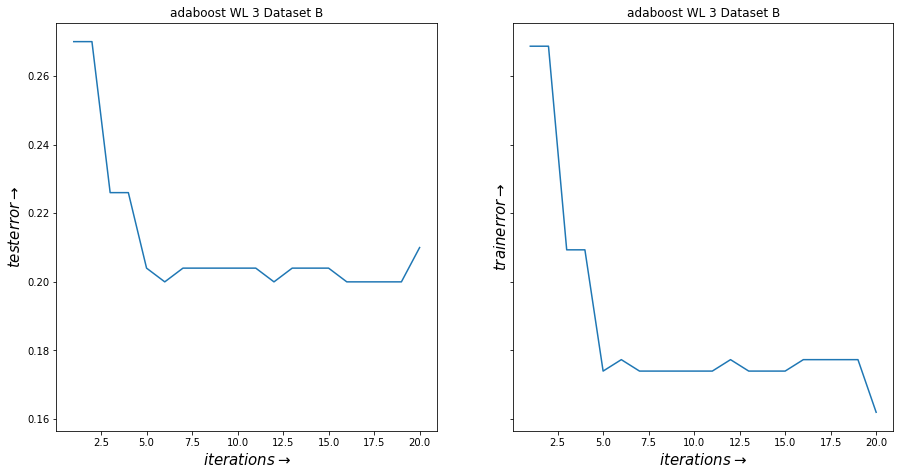

In [ ]:
## do not remove this cell - the below plots are the outputs of this cell.


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

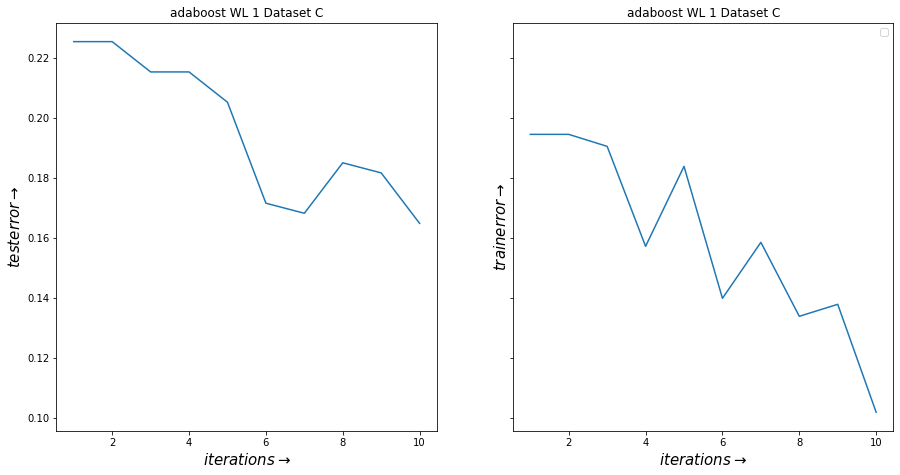

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

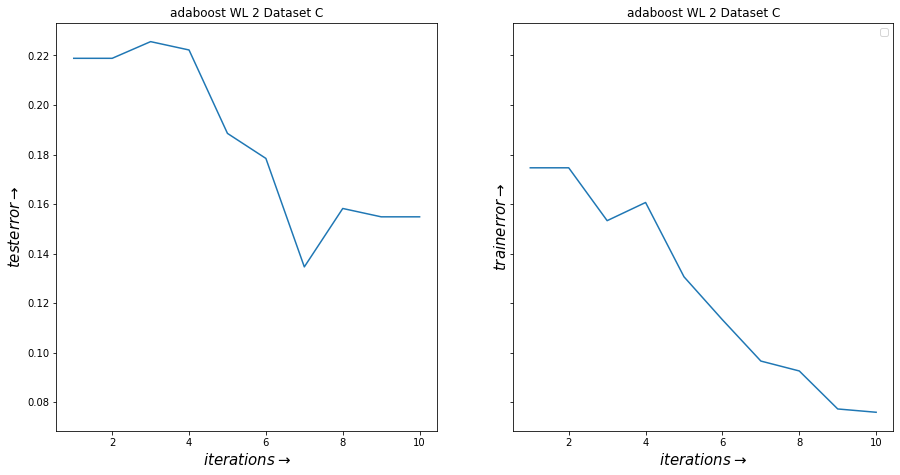

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

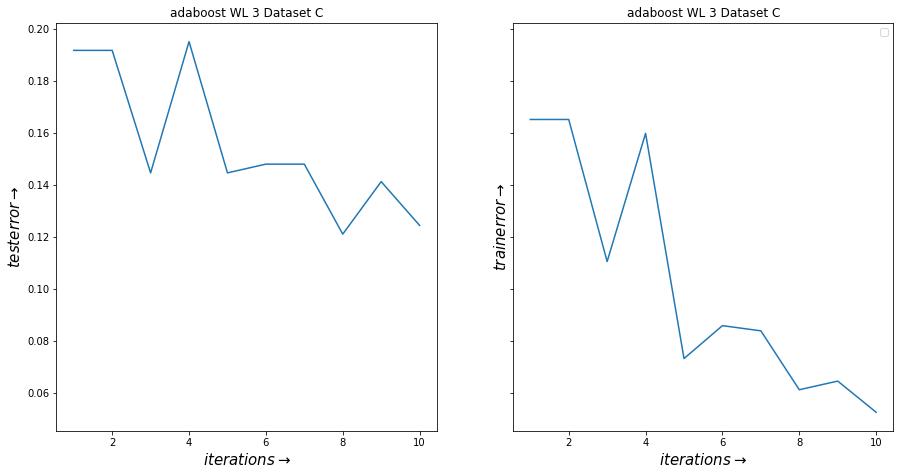

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

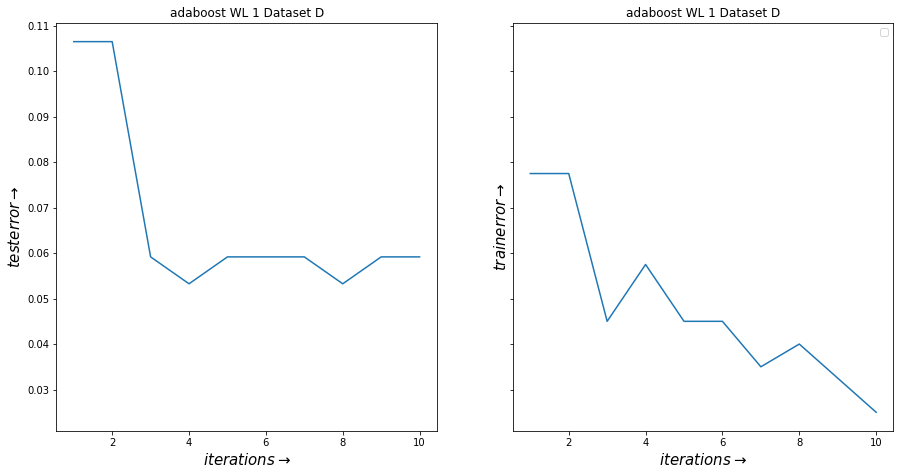

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

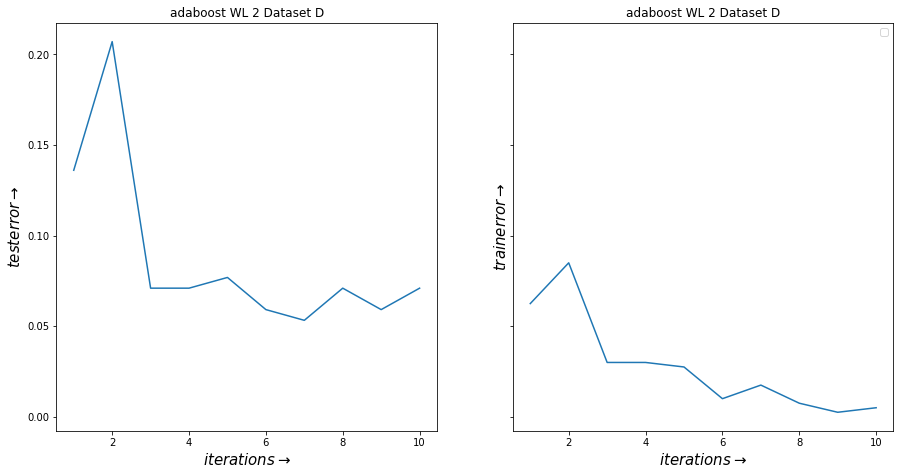

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

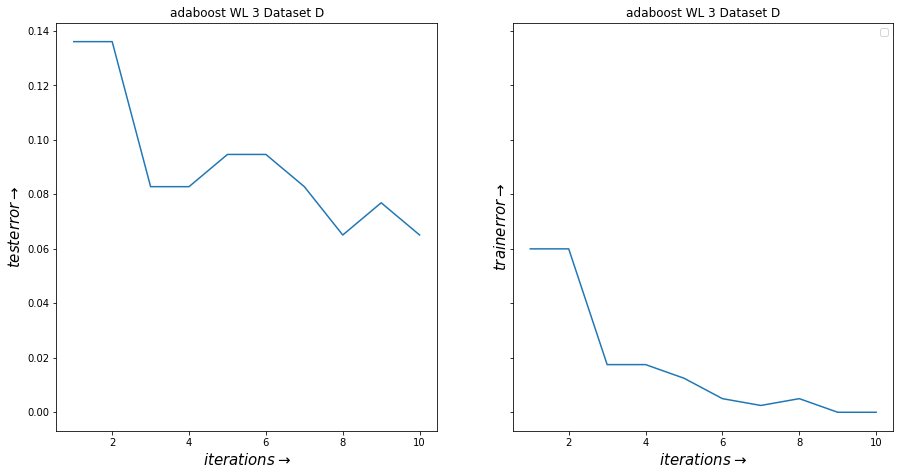

In [ ]:
# Codewrite cell princeton
# Plots for iteration vs error here
time = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
data_A = np.load('dataset_A.npz')
X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']
[a1, b1, y1] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 1)
[a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 2)
[a3, b3, y3] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 3)

plt.figure(0)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a1)
ax1.set_title('adaboot WL 1 Dataset A')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b1)
ax2.set_title('adaboost WL 1 Dataset A')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
plt.show()

plt.figure(1)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a2)
ax1.set_title('adaboost WL 2 Dataset A')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b2)
ax2.set_title('adaboost WL 2 Dataset A')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
plt.show()

plt.figure(2)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a3)
ax1.set_title('adaboost WL 3 Dataset A')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b3)
ax2.set_title('adaboost WL 3 Dataset A')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
plt.show()

data_A = np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']
[a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 1)

[a1, b1, y1] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 1)
[a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 2)
[a3, b3, y3] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 3)

plt.figure(0)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a1)
ax1.set_title('adaboost WL 1 Dataset B')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b1)
ax2.set_title('adaboost WL 1 Dataset B')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
plt.show()

plt.figure(1)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a2)
ax1.set_title('adaboost WL 2 Dataset B')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b2)
ax2.set_title('adaboost WL 2 Dataset B')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
plt.show()

plt.figure(2)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a3)
ax1.set_title('adaboost WL 3 Dataset B')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b3)
ax2.set_title('adaboost WL 3 Dataset B')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
plt.show()


data_A = np.load('dataset_C.npz')
X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']
time = [1,2,3,4,5,6,7,8,9,10]
[a1, b1, y1] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 1)
[a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 2)
[a3, b3, y3] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 3)

plt.figure(0)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a1)
ax1.set_title('adaboost WL 1 Dataset C')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b1)
ax2.set_title('adaboost WL 1 Dataset C')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
ax2.legend() 
plt.show()

plt.figure(1)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a2)
ax1.set_title('adaboost WL 2 Dataset C')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b2)
ax2.set_title('adaboost WL 2 Dataset C')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
ax2.legend() 
plt.show()

plt.figure(2)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a3)
ax1.set_title('adaboost WL 3 Dataset C')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b3)
ax2.set_title('adaboost WL 3 Dataset C')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
ax2.legend() 
plt.show()
data_A = np.load('dataset_D.npz')
X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']
[a1, b1, y1] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 1)
[a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 2)
[a3, b3, y3] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 3)

plt.figure(0)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a1)
ax1.set_title('adaboost WL 1 Dataset D')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b1)
ax2.set_title('adaboost WL 1 Dataset D')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
ax2.legend() 
plt.show()

plt.figure(1)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a2)
ax1.set_title('adaboost WL 2 Dataset D')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b2)
ax2.set_title('adaboost WL 2 Dataset D')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
ax2.legend() 
plt.show()

plt.figure(2)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
ax1.plot(time, a3)
ax1.set_title('adaboost WL 3 Dataset D')
ax1.set_xlabel(r'$iterations\rightarrow$',size=15)
ax1.set_ylabel(r'$test error\rightarrow$',size=15)


ax2.plot(time, b3)
ax2.set_title('adaboost WL 3 Dataset D')
ax2.set_xlabel(r'$iterations\rightarrow$',size=15)
ax2.set_ylabel(r'$train error\rightarrow$',size=15)
ax2.legend() 
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:226: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


<Figure size 432x288 with 0 Axes>

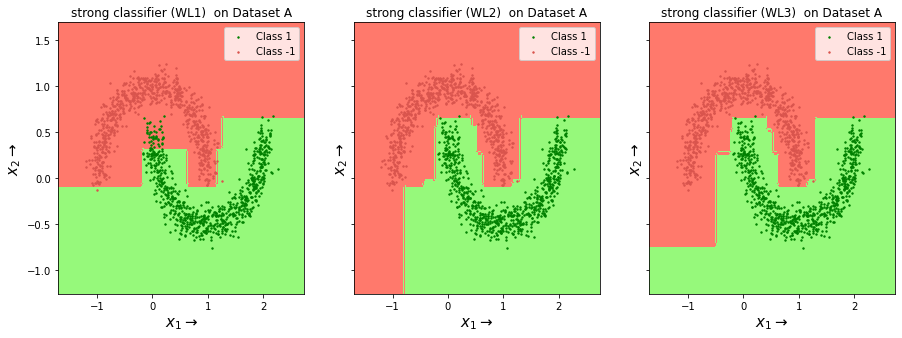

<Figure size 432x288 with 0 Axes>

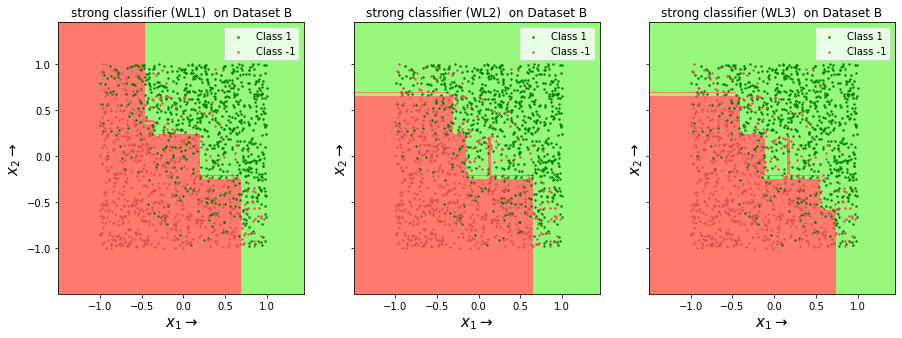

In [ ]:
# Codewrite cell 
# Plots for illustrating the classifier here

data_A = np.load('dataset_A.npz')
X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']

X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])


X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
[a, b, y1] = adaboost(X_train, Y_train.reshape(-1,1), test_samples, Y_test.reshape(-1,1), 20, 1)
[a, b, y2] = adaboost(X_train, Y_train.reshape(-1,1), test_samples, Y_test.reshape(-1,1), 20, 2)
[a, b, y3] = adaboost(X_train, Y_train.reshape(-1,1), test_samples, Y_test.reshape(-1,1), 20, 3)

plt.figure(0)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax1.contourf(X,Y,y1.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('strong classifier (WL1)  on Dataset A')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend() 


ax2.contourf(X,Y,y2.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax2.set_title('strong classifier (WL2)  on Dataset A')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend() 


ax3.contourf(X,Y,y3.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax3.set_title('strong classifier (WL3)  on Dataset A')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.legend() 
plt.show()

data_A = np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test = data_A['arr_0'],data_A['arr_1'],data_A['arr_2'],data_A['arr_3']

X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])


X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
[a, b, y1] = adaboost(X_train, Y_train.reshape(-1,1), test_samples, Y_test.reshape(-1,1), 10, 1)
[a, b, y2] = adaboost(X_train, Y_train.reshape(-1,1), test_samples, Y_test.reshape(-1,1), 20, 2)
[a, b, y3] = adaboost(X_train, Y_train.reshape(-1,1), test_samples, Y_test.reshape(-1,1), 20, 3)

plt.figure(1)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax1.contourf(X,Y,y1.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('strong classifier (WL1)  on Dataset B')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend() 

ax2.contourf(X,Y,y2.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax2.set_title('strong classifier (WL2)  on Dataset B')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend() 

ax3.contourf(X,Y,y3.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax3.set_title('strong classifier (WL3)  on Dataset B')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.legend() 
plt.show()


Textwrite cell:
Note : since the optimal train error values were obtained by less than 50 iterations and that led to a substantial saving, we used lesser number of iterations.

-As the number of iterations increase, the errors decrease because the classifiers become stronger.